## TRABALHO - COMPLETO

## Importando algumas bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
from scipy.stats import norm, kstest
%matplotlib inline

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

## Conectando com o site

In [3]:
site_soccer = "https://fbref.com/pt/comps/Big5/stats/jogadores/Maiores-5-Ligas-Europeias-Estatisticas"
gsw = urlopen(site_soccer)

In [4]:
soup = BeautifulSoup(gsw, 'lxml')
type(soup)

bs4.BeautifulSoup

In [5]:
titulo = soup.title
print(titulo)

<title>2023-2024 Maiores 5 Ligas Europeias estatísticas (jogadores) | FBref.com</title>


## Começando a construir o DataSet

In [6]:
# Inspecionando a página descobri que as linhas da tabela que quero pegar estão na tag tr.
# usei find_all('tr') para pegar as linhas com a tag tr.
rows = soup.find_all('tr')
print(rows[:10])

[<tr class="over_header">
<th aria-label="" class="over_header center" colspan="8" data-stat=""></th>
<th aria-label="" class="over_header center group_start" colspan="4" data-stat="header_playing">Tempo de jogo</th>
<th aria-label="" class="over_header center group_start" colspan="8" data-stat="header_performance">Desempenho</th>
<th aria-label="" class="over_header center group_start" colspan="4" data-stat="header_expected">Esperado</th>
<th aria-label="" class="over_header center group_start" colspan="3" data-stat="header_progression">Progressão</th>
<th aria-label="" class="over_header center group_start" colspan="10" data-stat="header_per90">A cada 90 minutos</th><th></th>
</tr>, <tr>
<th aria-label="Class." class="tooltip ranker poptip sort_default_asc show_partial_when_sorting center" data-stat="ranker" data-tip="&lt;strong&gt;Classificação&lt;/strong&gt;&lt;br&gt;Essa é a contagem de linhas, de cima para baixo.&lt;br&gt;Ela é recalculada seguindo a organização de uma coluna." s

In [7]:
# Inspecionando ainda mais a página, descobri que as células da página estavam na tag 'td',
# então rodei as linhas 'tr' e fui pegando todas as linhas 'td' que estavam dentro das linhas 'tr'.
for row in rows:
    row_td = row.find_all('td')
print(row_td)
type(row_td)

[<td class="left" csk="Łęgowski Mateusz" data-append-csv="75c62731" data-stat="player"><a href="/pt/jogadores/75c62731/Mateusz-Legowski">Mateusz Łęgowski</a></td>, <td class="left poptip" data-stat="nationality" data-tip="NT"><a href="/pt/pais/POL/Poland-Futebol"><span style="white-space: nowrap"><span class="f-i f-pl" style="">pl</span> POL</span></a></td>, <td class="center" csk="3.0" data-stat="position">LT</td>, <td class="left" data-stat="team"><a href="/pt/equipes/c5577084/Salernitana-Estatisticas">Salernitana</a></td>, <td class="left" data-stat="comp_level"><span title="Italy"><span class="f-i f-it" style="">it</span></span> <a href="/pt/comps/11/Serie-A-Estatisticas">Serie A</a></td>, <td class="center" data-stat="age">20-331</td>, <td class="center" data-stat="birth_year">2003</td>, <td class="right group_start" data-stat="games">16</td>, <td class="right" data-stat="games_starts">7</td>, <td class="right" csk="683" data-stat="minutes">683</td>, <td class="right" data-stat="m

bs4.element.ResultSet

In [8]:
# Como pode ser visto no resultado anterior, as linhas ainda estão com descrições 'html' embutidas ,então temos que fazer um 
# clean nas linhas para retirar essa tag 'html'.
str_cells = str(row_td)
text_clean = BeautifulSoup(str_cells, "lxml").get_text()
print(text_clean)

[Mateusz Łęgowski, pl POL, LT, Salernitana, it Serie A, 20-331, 2003, 16, 7, 683, 7.6, 0, 0, 0, 0, 0, 0, 1, 0, 0.1, 0.1, 0.2, 0,3, 14, 29, 11, 0,00, 0,00, 0,00, 0,00, 0,00, 0,01, 0,02, 0,04, 0,01, 0,04, Partidas]


In [9]:
import re
# Aqui usei todos os passos anteriores para pegar todas as informações necessárias e coloquei em uma list_rows.
list_rows = []
for row in rows:
    cells = row.find_all('td')
    str_cells = str(cells)
    limpar = re.compile('<.*?>')
    limpar2 = (re.sub(limpar, '',str_cells))
    list_rows.append(limpar2)
print(limpar2)
type(limpar2)

[Mateusz Łęgowski, pl POL, LT, Salernitana, it Serie A, 20-331, 2003, 16, 7, 683, 7.6, 0, 0, 0, 0, 0, 0, 1, 0, 0.1, 0.1, 0.2, 0,3, 14, 29, 11, 0,00, 0,00, 0,00, 0,00, 0,00, 0,01, 0,02, 0,04, 0,01, 0,04, Partidas]


str

In [10]:
#Aqui usei essa list_rows para formar uma dataset.
df_soccer = pd.DataFrame(list_rows)
df_soccer.head(10)

,0
0,[]
1,[]
2,"[Max Aarons, eng ENG, ZG, Bournemouth, eng Pre..."
3,"[Brenden Aaronson, us USA, LT, Union Berlin, d..."
4,"[Paxten Aaronson, us USA, LT, Eint Frankfurt, ..."
5,"[Yunis Abdelhamid, ma MAR, ZG, Reims, fr Ligue..."
6,"[Salis Abdul Samed, gh GHA, LT, Lens, fr Ligue..."
7,"[Laurent Abergel, fr FRA, LT, Lorient, fr Ligu..."
8,"[Matthis Abline, fr FRA, AT, Nantes, fr Ligue ..."
9,"[Abner, br BRA, ZG, Betis, es La Liga, 23-213,..."


In [11]:
# Aqui usei .str.split para separar os dados em diferentes colunas quando encontrasse um ', '.
# Esse espaço depois da virgula é importante, pois na tabela existem alguns dados que tem casas decimais.
df1_soccer = df_soccer[0].str.split(', ', expand=True)
df1_soccer.head(100)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,[],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,[Max Aarons,eng ENG,ZG,Bournemouth,eng Premier League,23-356,2000,12,11,950,...,"0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08",Partidas]
3,[Brenden Aaronson,us USA,LT,Union Berlin,de Bundesliga,23-065,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11",Partidas]
4,[Paxten Aaronson,us USA,LT,Eint Frankfurt,de Bundesliga,20-122,2003,7,1,101,...,"0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19",Partidas]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,[Jaidon Anthony,eng ENG,AT,Bournemouth,eng Premier League,24-025,1999,3,2,152,...,"0,00","0,00","0,00","0,00","0,04","0,00","0,04","0,04","0,04",Partidas]
96,[Waldemar Anton,de GER,ZG,Stuttgart,de Bundesliga,27-159,1996,16,16,1.408,...,"0,06","0,06","0,00","0,06","0,04","0,01","0,05","0,04","0,05",Partidas]
97,[Michail Antonio,jm JAM,AT,West Ham,eng Premier League,33-273,1990,12,11,813,...,"0,22","0,44","0,22","0,44","0,20","0,07","0,28","0,20","0,28",Partidas]
98,[Antony,br BRA,AT,Manchester Utd,eng Premier League,23-305,2000,14,10,840,...,"0,00","0,00","0,00","0,00","0,15","0,23","0,38","0,15","0,38",Partidas]


## Fazendo a limpeza do Banco de Dados

In [12]:
# Aqui usei str.strip('[') para retirar o caractere '[' da tabela.
df1_soccer[0] = df1_soccer[0].str.strip('[')
df1_soccer.head(100)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,],None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Max Aarons,eng ENG,ZG,Bournemouth,eng Premier League,23-356,2000,12,11,950,...,"0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08",Partidas]
3,Brenden Aaronson,us USA,LT,Union Berlin,de Bundesliga,23-065,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11",Partidas]
4,Paxten Aaronson,us USA,LT,Eint Frankfurt,de Bundesliga,20-122,2003,7,1,101,...,"0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19",Partidas]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Jaidon Anthony,eng ENG,AT,Bournemouth,eng Premier League,24-025,1999,3,2,152,...,"0,00","0,00","0,00","0,00","0,04","0,00","0,04","0,04","0,04",Partidas]
96,Waldemar Anton,de GER,ZG,Stuttgart,de Bundesliga,27-159,1996,16,16,1.408,...,"0,06","0,06","0,00","0,06","0,04","0,01","0,05","0,04","0,05",Partidas]
97,Michail Antonio,jm JAM,AT,West Ham,eng Premier League,33-273,1990,12,11,813,...,"0,22","0,44","0,22","0,44","0,20","0,07","0,28","0,20","0,28",Partidas]
98,Antony,br BRA,AT,Manchester Utd,eng Premier League,23-305,2000,14,10,840,...,"0,00","0,00","0,00","0,00","0,15","0,23","0,38","0,15","0,38",Partidas]


In [13]:
# Aqui usei str.strip('[') para retirar o caractere ']' da tabela.
df1_soccer[0] = df1_soccer[0].str.strip(']')
df1_soccer.head(3000)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Max Aarons,eng ENG,ZG,Bournemouth,eng Premier League,23-356,2000,12,11,950,...,"0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08",Partidas]
3,Brenden Aaronson,us USA,LT,Union Berlin,de Bundesliga,23-065,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11",Partidas]
4,Paxten Aaronson,us USA,LT,Eint Frankfurt,de Bundesliga,20-122,2003,7,1,101,...,"0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19",Partidas]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,Martín Zubimendi,es ESP,LT,Real Sociedad,es La Liga,24-327,1999,18,16,1.518,...,"0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17",Partidas]
2495,Martin Ødegaard,no NOR,LT,Arsenal,eng Premier League,25-009,1998,15,15,1.325,...,"0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32",Partidas]
2496,Milan Đurić,ba BIH,AT,Hellas Verona,it Serie A,33-218,1990,16,9,896,...,"0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25",Partidas]
2497,,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [14]:
# Aqui usei dropna(axis=0, how='any') para retirar as linhas com dados nulos.
df2_soccer = df1_soccer.dropna(axis=0, how='any')
df2_soccer.head(2900)

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
2,Max Aarons,eng ENG,ZG,Bournemouth,eng Premier League,23-356,2000,12,11,950,...,"0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08",Partidas]
3,Brenden Aaronson,us USA,LT,Union Berlin,de Bundesliga,23-065,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11",Partidas]
4,Paxten Aaronson,us USA,LT,Eint Frankfurt,de Bundesliga,20-122,2003,7,1,101,...,"0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19",Partidas]
5,Yunis Abdelhamid,ma MAR,ZG,Reims,fr Ligue 1,36-089,1987,16,16,1.440,...,"0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15",Partidas]
6,Salis Abdul Samed,gh GHA,LT,Lens,fr Ligue 1,23-275,2000,17,14,1.249,...,"0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10",Partidas]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor Zubeldia,es ESP,ZG,Real Sociedad,es La Liga,26-271,1997,17,16,1.409,...,"0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06",Partidas]
2494,Martín Zubimendi,es ESP,LT,Real Sociedad,es La Liga,24-327,1999,18,16,1.518,...,"0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17",Partidas]
2495,Martin Ødegaard,no NOR,LT,Arsenal,eng Premier League,25-009,1998,15,15,1.325,...,"0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32",Partidas]
2496,Milan Đurić,ba BIH,AT,Hellas Verona,it Serie A,33-218,1990,16,9,896,...,"0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25",Partidas]


In [15]:
# Usei .columns para criar o cabeçalho das colunas , ou seja, o que cada coluna se referia.
df3_soccer = pd.DataFrame(df2_soccer)
df3_soccer.columns = ["Jogador", "Nacionalidade", "Posição","Clube" , "Liga" , "Idade", "Ano em que nasceu", "Jogos em que entrou", "Jogos Iniciados" , "Minutos jogados", "90 min jogados", "Gols", "Assistências", "G+A", "Gols Normais", "Penâltis Batidos", "Penâltis Tentados", "Cartões Amarelos", "Cartões Vermelhos", "Gols esperados", "Gols normais previstos", "Gols Assistidos Esperados", "Gols esperados,exceto pênaltis,+gols assistidos", "Carregada Progressiva", "Passes Progressivos", "Passes Progressivos Recebidos", "Gols/90min", "Assis/90min", "(Gols+Assis)/90min", "Gols Normais/90min", "(Gols normais+Assis)/90min" , "Gols previstos por 90min", "Gols Assistidos esperados em 90min", " Gols esperados+gols previstos em 90min", "Gols normais previstos em 90min", "Gols esperados,exceto pênaltis,+gols assistidos em 90min", "Partidas"]
df3_soccer.head(2820)

,Jogador,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,Minutos jogados,...,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min",Partidas
2,Max Aarons,eng ENG,ZG,Bournemouth,eng Premier League,23-356,2000,12,11,950,...,"0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08",Partidas]
3,Brenden Aaronson,us USA,LT,Union Berlin,de Bundesliga,23-065,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11",Partidas]
4,Paxten Aaronson,us USA,LT,Eint Frankfurt,de Bundesliga,20-122,2003,7,1,101,...,"0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19",Partidas]
5,Yunis Abdelhamid,ma MAR,ZG,Reims,fr Ligue 1,36-089,1987,16,16,1.440,...,"0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15",Partidas]
6,Salis Abdul Samed,gh GHA,LT,Lens,fr Ligue 1,23-275,2000,17,14,1.249,...,"0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10",Partidas]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor Zubeldia,es ESP,ZG,Real Sociedad,es La Liga,26-271,1997,17,16,1.409,...,"0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06",Partidas]
2494,Martín Zubimendi,es ESP,LT,Real Sociedad,es La Liga,24-327,1999,18,16,1.518,...,"0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17",Partidas]
2495,Martin Ødegaard,no NOR,LT,Arsenal,eng Premier League,25-009,1998,15,15,1.325,...,"0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32",Partidas]
2496,Milan Đurić,ba BIH,AT,Hellas Verona,it Serie A,33-218,1990,16,9,896,...,"0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25",Partidas]


In [16]:
# Usei .drop('Partidas', inplace=True, axis=1) para remover a coluna Partida do meu dataset.
df3_soccer.drop('Partidas', inplace=True, axis=1)
df3_soccer.head(2821)

,Jogador,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,Minutos jogados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max Aarons,eng ENG,ZG,Bournemouth,eng Premier League,23-356,2000,12,11,950,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden Aaronson,us USA,LT,Union Berlin,de Bundesliga,23-065,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten Aaronson,us USA,LT,Eint Frankfurt,de Bundesliga,20-122,2003,7,1,101,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis Abdelhamid,ma MAR,ZG,Reims,fr Ligue 1,36-089,1987,16,16,1.440,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis Abdul Samed,gh GHA,LT,Lens,fr Ligue 1,23-275,2000,17,14,1.249,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor Zubeldia,es ESP,ZG,Real Sociedad,es La Liga,26-271,1997,17,16,1.409,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín Zubimendi,es ESP,LT,Real Sociedad,es La Liga,24-327,1999,18,16,1.518,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin Ødegaard,no NOR,LT,Arsenal,eng Premier League,25-009,1998,15,15,1.325,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan Đurić,ba BIH,AT,Hellas Verona,it Serie A,33-218,1990,16,9,896,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [17]:
# Usei .str[2:] para remover os dois primerios caracteres que tinham na tabela Nacionalidade, pois quando trouxe os dados da
# página, as bandeirinhas que tinham na tabela da página onde eu peguei os dados se transformaram em caracteres.
df3_soccer['Nacionalidade'] = df3_soccer['Nacionalidade'].str[2:]
df3_soccer.head(2821)

,Jogador,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,Minutos jogados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max Aarons,g ENG,ZG,Bournemouth,eng Premier League,23-356,2000,12,11,950,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden Aaronson,USA,LT,Union Berlin,de Bundesliga,23-065,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten Aaronson,USA,LT,Eint Frankfurt,de Bundesliga,20-122,2003,7,1,101,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis Abdelhamid,MAR,ZG,Reims,fr Ligue 1,36-089,1987,16,16,1.440,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis Abdul Samed,GHA,LT,Lens,fr Ligue 1,23-275,2000,17,14,1.249,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor Zubeldia,ESP,ZG,Real Sociedad,es La Liga,26-271,1997,17,16,1.409,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín Zubimendi,ESP,LT,Real Sociedad,es La Liga,24-327,1999,18,16,1.518,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin Ødegaard,NOR,LT,Arsenal,eng Premier League,25-009,1998,15,15,1.325,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan Đurić,BIH,AT,Hellas Verona,it Serie A,33-218,1990,16,9,896,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [18]:
# Usei .str[:2] para guardar apenas os dois primeiros caracteres/números que tinham nessa coluna , pois no site depois da idade
# tinham '-***' , sendo * um número, que se referiam aos dias de vida da pessoa.
df3_soccer['Idade'] = df3_soccer['Idade'].str[:2]
df3_soccer.head(2821)

,Jogador,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,Minutos jogados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max Aarons,g ENG,ZG,Bournemouth,eng Premier League,23,2000,12,11,950,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden Aaronson,USA,LT,Union Berlin,de Bundesliga,23,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten Aaronson,USA,LT,Eint Frankfurt,de Bundesliga,20,2003,7,1,101,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis Abdelhamid,MAR,ZG,Reims,fr Ligue 1,36,1987,16,16,1.440,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis Abdul Samed,GHA,LT,Lens,fr Ligue 1,23,2000,17,14,1.249,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor Zubeldia,ESP,ZG,Real Sociedad,es La Liga,26,1997,17,16,1.409,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín Zubimendi,ESP,LT,Real Sociedad,es La Liga,24,1999,18,16,1.518,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin Ødegaard,NOR,LT,Arsenal,eng Premier League,25,1998,15,15,1.325,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan Đurić,BIH,AT,Hellas Verona,it Serie A,33,1990,16,9,896,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [19]:
# Também  tinha uma bandeirinha na coluna Liga que se referia de qual pais essa liga é , decidi retirar esses caracteres
# que acabaram sendo formados.
df3_soccer['Liga'] = df3_soccer['Liga'].str[2:]
df3_soccer.head(2821)

,Jogador,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,Minutos jogados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max Aarons,g ENG,ZG,Bournemouth,g Premier League,23,2000,12,11,950,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,101,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,1.440,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,1.249,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,1.409,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,1.518,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin Ødegaard,NOR,LT,Arsenal,g Premier League,25,1998,15,15,1.325,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,896,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [20]:
# Algumas bandeirinhas acabaram criando 3 caracteres em vez de 2, aqui estou tirando a letra 'g' que acabou sendo deixado
# pela bandeirinha da inglaterra.
df3_soccer['Liga'] = df3_soccer['Liga'].str.replace('g ', '')
df3_soccer.head(2821)

,Jogador,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,Minutos jogados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max Aarons,g ENG,ZG,Bournemouth,Premier League,23,2000,12,11,950,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,327,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,101,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,1.440,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,1.249,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,1.409,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,1.518,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,1.325,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,896,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [21]:
# Estou usando .str.split(' ', 1, expand=True) para separar o Nome do jogador em Nome e Sobrenome.
df3_soccer[['Nome', 'Sobrenome']] = df3_soccer['Jogador'].str.split(' ', 1, expand=True)
df3_soccer.head(2821)

C:\Users\user\AppData\Local\Temp\ipykernel_9444\833937153.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df3_soccer[['Nome', 'Sobrenome']] = df3_soccer['Jogador'].str.split(' ', 1, expand=True)


,Jogador,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,Minutos jogados,...,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min",Nome,Sobrenome
2,Max Aarons,g ENG,ZG,Bournemouth,Premier League,23,2000,12,11,950,...,"0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08",Max,Aarons
3,Brenden Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,327,...,"0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11",Brenden,Aaronson
4,Paxten Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,101,...,"0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19",Paxten,Aaronson
5,Yunis Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,1.440,...,"0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15",Yunis,Abdelhamid
6,Salis Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,1.249,...,"0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10",Salis,Abdul Samed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,1.409,...,"0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06",Igor,Zubeldia
2494,Martín Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,1.518,...,"0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17",Martín,Zubimendi
2495,Martin Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,1.325,...,"0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32",Martin,Ødegaard
2496,Milan Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,896,...,"0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25",Milan,Đurić


In [22]:
# Usei drop('Jogador', inplace=True, axis=1) para eliminar a coluna Jogador.
df3_soccer.drop('Jogador', inplace=True, axis=1)
df3_soccer.head(2821)

,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,Minutos jogados,90 min jogados,...,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min",Nome,Sobrenome
2,g ENG,ZG,Bournemouth,Premier League,23,2000,12,11,950,10.6,...,"0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08",Max,Aarons
3,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,327,3.6,...,"0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11",Brenden,Aaronson
4,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,101,1.1,...,"0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19",Paxten,Aaronson
5,MAR,ZG,Reims,Ligue 1,36,1987,16,16,1.440,16.0,...,"0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15",Yunis,Abdelhamid
6,GHA,LT,Lens,Ligue 1,23,2000,17,14,1.249,13.9,...,"0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10",Salis,Abdul Samed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,1.409,15.7,...,"0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06",Igor,Zubeldia
2494,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,1.518,16.9,...,"0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17",Martín,Zubimendi
2495,NOR,LT,Arsenal,Premier League,25,1998,15,15,1.325,14.7,...,"0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32",Martin,Ødegaard
2496,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,896,10.0,...,"0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25",Milan,Đurić


In [23]:
# Aqui criei uma nova ordem nas colunas , pois quero que Nome e Sobrenome sejam as primeiras colunas aparecer.
nova_ordem = ["Nome", "Sobrenome", "Nacionalidade", "Posição","Clube" , "Liga" , "Idade", "Ano em que nasceu", "Jogos em que entrou", "Jogos Iniciados" , "Minutos jogados", "90 min jogados", "Gols", "Assistências", "G+A", "Gols Normais", "Penâltis Batidos", "Penâltis Tentados", "Cartões Amarelos", "Cartões Vermelhos", "Gols esperados", "Gols normais previstos", "Gols Assistidos Esperados", "Gols esperados,exceto pênaltis,+gols assistidos", "Carregada Progressiva", "Passes Progressivos", "Passes Progressivos Recebidos", "Gols/90min", "Assis/90min", "(Gols+Assis)/90min", "Gols Normais/90min", "(Gols normais+Assis)/90min" , "Gols previstos por 90min", "Gols Assistidos esperados em 90min", " Gols esperados+gols previstos em 90min", "Gols normais previstos em 90min", "Gols esperados,exceto pênaltis,+gols assistidos em 90min"]
df3_soccer = df3_soccer.reindex(columns=nova_ordem)
df3_soccer.head(2821)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max,Aarons,g ENG,ZG,Bournemouth,Premier League,23,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [24]:
# Usei dropna(axis=0, how='any') para remover novamente as linhas com dados nulos, dessa vez para a coluna
# Sobrenome e Nacionalidade.
df3_soccer = df3_soccer.dropna(subset=['Sobrenome'])
df3_soccer = df3_soccer.dropna(subset=['Nacionalidade'])
df3_soccer.head(2821)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max,Aarons,g ENG,ZG,Bournemouth,Premier League,23,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [25]:
# Removendo todos os dados nulos
df3_soccer.dropna(inplace=True)
df3_soccer.head(2821)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max,Aarons,g ENG,ZG,Bournemouth,Premier League,23,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [26]:
# Aqui tive o mesmo problema que tive anterior na coluna Liga, usei str.replace('g ', '') para remover o caractere g.
df3_soccer['Nacionalidade'] = df3_soccer['Nacionalidade'].str.replace('g ', '')
df3_soccer.head(2821)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max,Aarons,ENG,ZG,Bournemouth,Premier League,23,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [27]:
# Checando se outras bandeirinhas acabaram criando 3 caracteres, descobri que existia mais três que criavam 3 caracteres
#, como anteriormente ja tinha removido 2 caracteres, só precisei retirar o outro caractere extra.
df3_soccer['Nacionalidade'] = df3_soccer['Nacionalidade'].str.replace('r ', '')
df3_soccer['Nacionalidade'] = df3_soccer['Nacionalidade'].str.replace('t ', '')
df3_soccer['Nacionalidade'] = df3_soccer['Nacionalidade'].str.replace('s ', '')
df3_soccer.head(2821)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max,Aarons,ENG,ZG,Bournemouth,Premier League,23,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [28]:
# Passando para inteiros os valores que serão analisados.
df3_soccer['Idade'] = pd.to_numeric(df3_soccer['Idade'], errors='coerce').map('{:.0f}'.format)
df3_soccer['Gols'] = pd.to_numeric(df3_soccer['Gols'], errors='coerce')
df3_soccer['Minutos jogados'] = pd.to_numeric(df3_soccer['Minutos jogados'], errors='coerce')
df3_soccer['Assistências'] = pd.to_numeric(df3_soccer['Assistências'], errors='coerce')
df3_soccer['Carregada Progressiva'] = pd.to_numeric(df3_soccer['Carregada Progressiva'], errors='coerce')
df3_soccer['Passes Progressivos'] = pd.to_numeric(df3_soccer['Passes Progressivos'], errors='coerce')
df3_soccer['Passes Progressivos Recebidos'] = pd.to_numeric(df3_soccer['Passes Progressivos Recebidos'], errors='coerce')
df3_soccer['Cartões Amarelos'] = pd.to_numeric(df3_soccer['Cartões Amarelos'], errors='coerce').dropna()
df3_soccer['Cartões Vermelhos'] = pd.to_numeric(df3_soccer['Cartões Amarelos'], errors='coerce').dropna()
df3_soccer['Jogos em que entrou'] = pd.to_numeric(df3_soccer['Jogos em que entrou'], errors='coerce').dropna()
df3_soccer

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max,Aarons,ENG,ZG,Bournemouth,Premier League,23,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [29]:
# Removendo os dados Nulos das Colunas Carregada Progressiva, Passes Progressivos e Passes Progressivos Recebidos.
df3_soccer = df3_soccer.dropna(subset=['Carregada Progressiva'])
df3_soccer = df3_soccer.dropna(subset=['Passes Progressivos'])
df3_soccer = df3_soccer.dropna(subset=['Passes Progressivos Recebidos'])
df3_soccer.head(2821)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
2,Max,Aarons,ENG,ZG,Bournemouth,Premier League,23,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
3,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
4,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
5,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
6,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2493,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2494,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2495,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2496,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [30]:
# Para resolver o Problema de leitura no Site em que acaba lendos os valores erroneamente
def multiply_decimal(value):
    if isinstance(value, float) and value.is_integer():
        return value
    elif isinstance(value, float):
        return value * 10
    else:
        return value
    
df3_soccer['Minutos jogados'] = df3_soccer['Minutos jogados'].apply(multiply_decimal)
df3_soccer['Minutos jogados'] = df3_soccer['Minutos jogados'].apply(multiply_decimal)
df3_soccer['Minutos jogados'] = df3_soccer['Minutos jogados'].apply(multiply_decimal)
df3_soccer['Minutos jogados']

2        950.0
3        327.0
4        101.0
5        144.0
6       1249.0
         ...  
2493    1409.0
2494    1518.0
2495    1325.0
2496     896.0
2498     683.0
Name: Minutos jogados, Length: 2305, dtype: float64

In [31]:
# Aqui resetei o indice para que a primeira linha tenha o índice começando do um também.
df3_soccer = df3_soccer.reset_index(drop=True)
df3_soccer.index = df3_soccer.index + 1
df3_soccer.head(2821)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
1,Max,Aarons,ENG,ZG,Bournemouth,Premier League,23,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
2,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
3,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
4,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
5,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2302,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2303,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2304,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


In [32]:
df3_soccer.head(2821)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
1,Max,Aarons,ENG,ZG,Bournemouth,Premier League,23,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
2,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
3,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
4,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
5,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2301,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2302,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2303,Martin,Ødegaard,NOR,LT,Arsenal,Premier League,25,1998,15,15,...,"0,27","0,20","0,48","0,14","0,34","0,25","0,18","0,43","0,15","0,32"
2304,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


## Arquivo CSV

Criando o Arquivo CSV

In [33]:
csv_file=df3_soccer.to_csv()
print(csv_file)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,Minutos jogados,90 min jogados,Gols,Assistências,G+A,Gols Normais,Penâltis Batidos,Penâltis Tentados,Cartões Amarelos,Cartões Vermelhos,Gols esperados,Gols normais previstos,Gols Assistidos Esperados,"Gols esperados,exceto pênaltis,+gols assistidos",Carregada Progressiva,Passes Progressivos,Passes Progressivos Recebidos,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min, Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
1,Max,Aarons,ENG,ZG,Bournemouth,Premier League,23,2000,12,11,950.0,10.6,0,1,1,0,0,0,1,1,0.0,0.0,0.8,"0,8",16.0,31.0,19.0,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
2,Brenden,Aaronson, USA,LT,Union Berlin, Bundesliga,23,2000,11,4,327.0,3.6,0,0,0,0,0,0,2,2,0.1,0.1,

Salvando o Arquivo CSV

In [34]:
df3_soccer.to_csv('df3_soccer_Completo.csv') 
df3_soccer.to_csv(r'C:\Users\user\Desktop\Jupyter\df3_soccer_Completo.csv')

## Análise Estatística e Exploratória de Dados

A seguir estarei calculando a media, mediana e moda para Idade, Minutos jogados , Gols, Assistência , Cartões Amarelos , Cartões Vermelhos,Carregadas Progressivas , Passes Progressivos , Passes Progressivos Recebidos.
Também estarei calculando a media, mediana e moda para todos os Jogadores e também estarei calculando por Posição.

In [35]:
# Media de Idade dos Jogadores
df3_soccer['Idade'] = pd.to_numeric(df3_soccer['Idade'], errors='coerce')
media_Idade=df3_soccer['Idade'].mean()
print("Média das idades:", media_Idade)

Média das idades: 25.848024316109424


In [36]:
# Mediana de Idade dos Jogadores
mediana_Idade=df3_soccer['Idade'].median()
print("Mediana das idades:", mediana_Idade)

Mediana das idades: 26.0


In [37]:
# Moda da Idade dos Jogadores
moda_Idade=df3_soccer['Idade'].mode().values[0]
print("Moda das idades:", moda_Idade)

Moda das idades: 26.0


In [38]:
# Média de Minutos jogados dos jogadores
df3_soccer['Minutos jogados'] = pd.to_numeric(df3_soccer['Minutos jogados'], errors='coerce')
media_Minutos_jogados = df3_soccer['Minutos jogados'].mean()
print("Média de Minutos jogados por jogador:", media_Minutos_jogados)

Média de Minutos jogados por jogador: 610.4164859002169


In [39]:
# Mediana de Minutos jogados dos jogadores
Mediana_Minutos_jogados_jogador= df3_soccer['Minutos jogados'].median()
print("Mediana de Minutos jogados por jogador:", Mediana_Minutos_jogados_jogador)

Mediana de Minutos jogados por jogador: 557.0


In [40]:
# Moda de Minutos jogados dos jogadores
moda_Gols_jogador=df3_soccer['Minutos jogados'].mode().values[0]
print("Moda da quantidade de Minutos jogados:", moda_Gols_jogador)

Moda da quantidade de Minutos jogados: 153.0


In [41]:
# Média de Gols dos jogadores
df3_soccer['Gols'] = pd.to_numeric(df3_soccer['Gols'], errors='coerce')
media_Gols = df3_soccer['Gols'].mean()
print("Média de Gols por jogador:", media_Gols)

Média de Gols por jogador: 0.9405639913232104


In [42]:
# Média de Gols por Posição
def Media_Gols_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_gols_df = posição_df['Gols']
    media_Gols = coluna_gols_df.mean()
    return media_Gols

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Gols = Media_Gols_Posicao(df3_soccer, posição)
    print("Média de gols para a posição", posição, ":", media_Gols)

Média de gols para a posição ZG : 0.3876967095851216
Média de gols para a posição LT : 0.7008196721311475
Média de gols para a posição AT : 2.625386996904025
Média de gols para a posição LT,AT : 1.1796116504854368
Média de gols para a posição AT,LT : 1.6160714285714286
Média de gols para a posição LT,ZG : 0.543859649122807
Média de gols para a posição ZG,LT : 0.3522727272727273
Média de gols para a posição ZG,AT : 0.2857142857142857
Média de gols para a posição G : 0.0
Média de gols para a posição AT,ZG : 0.9333333333333333


In [43]:
# Mediana de Gols dos jogadores
Mediana_Gols_jogador= df3_soccer['Gols'].median()
print("Mediana de Gols por jogador:", Mediana_Gols_jogador)

Mediana de Gols por jogador: 0.0


In [44]:
# Mediana de Gols dos jogadores
def Mediana_Gols_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Gols_df = posição_df['Gols']
    mediana_Gols = coluna_Gols_df.median()
    return mediana_Gols

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Gols = Mediana_Gols_Posição(df3_soccer, posição)
    print("Mediana de Gols por Posição do tipo", posição  + ":", mediana_Gols)

Mediana de Gols por Posição do tipo ZG: 0.0
Mediana de Gols por Posição do tipo LT: 0.0
Mediana de Gols por Posição do tipo AT: 2.0
Mediana de Gols por Posição do tipo LT,AT: 1.0
Mediana de Gols por Posição do tipo AT,LT: 1.0
Mediana de Gols por Posição do tipo LT,ZG: 0.0
Mediana de Gols por Posição do tipo ZG,LT: 0.0
Mediana de Gols por Posição do tipo ZG,AT: 0.0
Mediana de Gols por Posição do tipo G: 0.0
Mediana de Gols por Posição do tipo AT,ZG: 1.0


In [45]:
# Moda de Gols dos jogadores
moda_Gols_jogador=df3_soccer['Gols'].mode().values[0]
print("Moda da quantidade de gols:", moda_Gols_jogador)

Moda da quantidade de gols: 0


In [46]:
# Moda de Gols por Posição
def Moda_Gols_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Gols_df = posição_df['Gols']
    moda_Gols = coluna_Gols_df.mode().values[0]
    return moda_Gols

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Gols = Moda_Gols_Posição(df3_soccer, posição)
    print("Moda de Gols por Posição do tipo", posição  + ":", moda_Gols)

Moda de Gols por Posição do tipo ZG: 0
Moda de Gols por Posição do tipo LT: 0
Moda de Gols por Posição do tipo AT: 0
Moda de Gols por Posição do tipo LT,AT: 0
Moda de Gols por Posição do tipo AT,LT: 0
Moda de Gols por Posição do tipo LT,ZG: 0
Moda de Gols por Posição do tipo ZG,LT: 0
Moda de Gols por Posição do tipo ZG,AT: 0
Moda de Gols por Posição do tipo G: 0
Moda de Gols por Posição do tipo AT,ZG: 0


In [47]:
# Média de Assistências dos Jogadores
df3_soccer['Assistências'] = pd.to_numeric(df3_soccer['Assistências'], errors='coerce')
media_Assistencias_jogador = df3_soccer['Assistências'].mean()
print("Média de Assistências por jogador:", media_Assistencias_jogador)

Média de Assistências por jogador: 0.6685466377440347


In [48]:
# Média de Assistências por Posição
def Media_Assistencias_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Assistencias_df = posição_df['Assistências']
    media_Assistencias = coluna_Assistencias_df.mean()
    return media_Assistencias

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Assistencias = Media_Assistencias_Posicao(df3_soccer, posição)
    print("Média de Assistencias para a posição", posição, ":", media_Assistencias)

Média de Assistencias para a posição ZG : 0.49928469241773965
Média de Assistencias para a posição LT : 0.694672131147541
Média de Assistencias para a posição AT : 1.0247678018575852
Média de Assistencias para a posição LT,AT : 0.9805825242718447
Média de Assistencias para a posição AT,LT : 0.78125
Média de Assistencias para a posição LT,ZG : 0.6842105263157895
Média de Assistencias para a posição ZG,LT : 0.6136363636363636
Média de Assistencias para a posição ZG,AT : 0.8333333333333334
Média de Assistencias para a posição G : 0.033783783783783786
Média de Assistencias para a posição AT,ZG : 0.4


In [49]:
# Mediana de Assistências dos Jogadores
mediana_Assistencias_jogador=df3_soccer['Assistências'].median()
print("Mediana de Assistências por jogador:", mediana_Assistencias_jogador)

Mediana de Assistências por jogador: 0.0


In [50]:
# Mediana de Assistências por Posição
def Mediana_Assistencias_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Assistencias_df = posição_df['Assistências']
    mediana_Assistencias = coluna_Assistencias_df.median()
    return mediana_Assistencias

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Assistencias = Mediana_Assistencias_Posição(df3_soccer, posição)
    print("Mediana de Assistências por Posição do tipo", posição  + ":", mediana_Assistencias)

Mediana de Assistências por Posição do tipo ZG: 0.0
Mediana de Assistências por Posição do tipo LT: 0.0
Mediana de Assistências por Posição do tipo AT: 0.0
Mediana de Assistências por Posição do tipo LT,AT: 0.0
Mediana de Assistências por Posição do tipo AT,LT: 0.0
Mediana de Assistências por Posição do tipo LT,ZG: 0.0
Mediana de Assistências por Posição do tipo ZG,LT: 0.0
Mediana de Assistências por Posição do tipo ZG,AT: 0.0
Mediana de Assistências por Posição do tipo G: 0.0
Mediana de Assistências por Posição do tipo AT,ZG: 0.0


In [51]:
# Moda de Assistências dos Jogadores
moda_Assistencias_jogador=df3_soccer['Assistências'].mode().values[0]
print("Moda da quantidade de Assistências:", moda_Assistencias_jogador)

Moda da quantidade de Assistências: 0


In [52]:
# Moda de Assistências por Posição
def Moda_Assistencias_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Assistencias_df = posição_df['Assistências']
    moda_Assistencias = coluna_Assistencias_df.mode().values[0]
    return moda_Assistencias

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Assistencias = Moda_Assistencias_Posição(df3_soccer, posição)
    print("Moda de Assistências por Posição do tipo", posição  + ":", moda_Assistencias)

Moda de Assistências por Posição do tipo ZG: 0
Moda de Assistências por Posição do tipo LT: 0
Moda de Assistências por Posição do tipo AT: 0
Moda de Assistências por Posição do tipo LT,AT: 0
Moda de Assistências por Posição do tipo AT,LT: 0
Moda de Assistências por Posição do tipo LT,ZG: 0
Moda de Assistências por Posição do tipo ZG,LT: 0
Moda de Assistências por Posição do tipo ZG,AT: 0
Moda de Assistências por Posição do tipo G: 0
Moda de Assistências por Posição do tipo AT,ZG: 0


In [53]:
# Média de Cartões Amarelos dos Jogadores
df3_soccer['Cartões Amarelos'] = pd.to_numeric(df3_soccer['Cartões Amarelos'], errors='coerce')
media_Cartões_Amarelos_jogador = df3_soccer['Cartões Amarelos'].mean()
print("Média de Cartões_Amarelos por jogador:", media_Cartões_Amarelos_jogador)

Média de Cartões_Amarelos por jogador: 1.5349240780911062


In [54]:
# Média de Cartões Amarelos por Posição
def Media_Cartões_Amarelos_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Cartões_Amarelos_df = posição_df['Cartões Amarelos']
    media_Cartões_Amarelos = coluna_Cartões_Amarelos_df.mean()
    return media_Cartões_Amarelos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Cartões_Amarelos = Media_Cartões_Amarelos_Posicao(df3_soccer, posição)
    print("Média de Cartões_Amarelos para a posição", posição, ":", media_Cartões_Amarelos)

Média de Cartões_Amarelos para a posição ZG : 1.8769670958512161
Média de Cartões_Amarelos para a posição LT : 1.9467213114754098
Média de Cartões_Amarelos para a posição AT : 1.2074303405572755
Média de Cartões_Amarelos para a posição LT,AT : 1.2378640776699028
Média de Cartões_Amarelos para a posição AT,LT : 1.1339285714285714
Média de Cartões_Amarelos para a posição LT,ZG : 1.4385964912280702
Média de Cartões_Amarelos para a posição ZG,LT : 1.3977272727272727
Média de Cartões_Amarelos para a posição ZG,AT : 1.0952380952380953
Média de Cartões_Amarelos para a posição G : 0.6554054054054054
Média de Cartões_Amarelos para a posição AT,ZG : 0.9666666666666667


In [55]:
# Mediana de Cartões Amarelos dos Jogadores
mediana_Cartões_Amarelos_jogador=df3_soccer['Cartões Amarelos'].median()
print("Mediana de Cartões Amarelos por jogador:", mediana_Cartões_Amarelos_jogador)

Mediana de Cartões Amarelos por jogador: 1.0


In [56]:
# Mediana de Cartões Amarelos por Posição
def Mediana_Cartões_Amarelos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Cartões_Amarelos_df = posição_df['Cartões Amarelos']
    mediana_Cartões_Amarelos = coluna_Cartões_Amarelos_df.median()
    return mediana_Cartões_Amarelos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Cartões_Amarelos = Mediana_Cartões_Amarelos_Posição(df3_soccer, posição)
    print("Mediana de Cartões Amarelos por Posição do tipo", posição + ":", mediana_Cartões_Amarelos)

Mediana de Cartões Amarelos por Posição do tipo ZG: 2.0
Mediana de Cartões Amarelos por Posição do tipo LT: 2.0
Mediana de Cartões Amarelos por Posição do tipo AT: 1.0
Mediana de Cartões Amarelos por Posição do tipo LT,AT: 1.0
Mediana de Cartões Amarelos por Posição do tipo AT,LT: 1.0
Mediana de Cartões Amarelos por Posição do tipo LT,ZG: 1.0
Mediana de Cartões Amarelos por Posição do tipo ZG,LT: 1.0
Mediana de Cartões Amarelos por Posição do tipo ZG,AT: 1.0
Mediana de Cartões Amarelos por Posição do tipo G: 0.0
Mediana de Cartões Amarelos por Posição do tipo AT,ZG: 1.0


In [57]:
# Moda de Cartões Amarelos dos Jogadores
moda_Cartões_Amarelos_jogador=df3_soccer['Cartões Amarelos'].mode().values[0]
print("Moda da quantidade de Cartões Amarelos:", moda_Cartões_Amarelos_jogador)

Moda da quantidade de Cartões Amarelos: 0


In [58]:
# Moda de Cartões Amarelos por Posição
def Moda_Cartões_Amarelos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Cartões_Amarelos_df = posição_df['Cartões Amarelos']
    moda_Cartões_Amarelos = coluna_Cartões_Amarelos_df.mode().values[0]
    return moda_Cartões_Amarelos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Cartões_Amarelos = Moda_Cartões_Amarelos_Posição(df3_soccer, posição)
    print("Moda de Cartões Amarelos por Posição do tipo", posição  + ":", moda_Cartões_Amarelos)

Moda de Cartões Amarelos por Posição do tipo ZG: 0
Moda de Cartões Amarelos por Posição do tipo LT: 0
Moda de Cartões Amarelos por Posição do tipo AT: 0
Moda de Cartões Amarelos por Posição do tipo LT,AT: 0
Moda de Cartões Amarelos por Posição do tipo AT,LT: 0
Moda de Cartões Amarelos por Posição do tipo LT,ZG: 0
Moda de Cartões Amarelos por Posição do tipo ZG,LT: 0
Moda de Cartões Amarelos por Posição do tipo ZG,AT: 0
Moda de Cartões Amarelos por Posição do tipo G: 0
Moda de Cartões Amarelos por Posição do tipo AT,ZG: 0


In [59]:
# Média de Cartões Vermelhos dos Jogadores
df3_soccer['Cartões Vermelhos'] = pd.to_numeric(df3_soccer['Cartões Vermelhos'], errors='coerce')
media_cartoes_vermelhos_jogador = df3_soccer['Cartões Vermelhos'].mean()
print("Média de Cartões Vermelhos por jogador:", media_cartoes_vermelhos_jogador)

Média de Cartões Vermelhos por jogador: 1.5349240780911062


In [60]:
# Média de Cartões Vermelhos por Posição
def Media_Cartões_Vermelhos_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Cartões_Vermelhos_df = posição_df['Cartões Vermelhos']
    media_Cartões_Vermelhos = coluna_Cartões_Vermelhos_df.mean()
    return media_Cartões_Vermelhos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Cartões_Vermelhos = Media_Cartões_Vermelhos_Posicao(df3_soccer, posição)
    print("Média de Cartões Vermelhos para a posição", posição, ":", media_Cartões_Vermelhos)

Média de Cartões Vermelhos para a posição ZG : 1.8769670958512161
Média de Cartões Vermelhos para a posição LT : 1.9467213114754098
Média de Cartões Vermelhos para a posição AT : 1.2074303405572755
Média de Cartões Vermelhos para a posição LT,AT : 1.2378640776699028
Média de Cartões Vermelhos para a posição AT,LT : 1.1339285714285714
Média de Cartões Vermelhos para a posição LT,ZG : 1.4385964912280702
Média de Cartões Vermelhos para a posição ZG,LT : 1.3977272727272727
Média de Cartões Vermelhos para a posição ZG,AT : 1.0952380952380953
Média de Cartões Vermelhos para a posição G : 0.6554054054054054
Média de Cartões Vermelhos para a posição AT,ZG : 0.9666666666666667


In [61]:
# Mediana de Cartões Vermelhos dos Jogadores
moda_Cartões_Vermelhos_jogador=df3_soccer['Cartões Vermelhos'].mode().values[0]
print("Moda da quantidade de Cartões Vermelhos:", moda_Cartões_Vermelhos_jogador)

Moda da quantidade de Cartões Vermelhos: 0


In [62]:
# Mediana de Cartões Vermelhos por Posição
def Mediana_Cartões_Vermelhos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Cartões_Vermelhos_df = posição_df['Cartões Vermelhos']
    mediana_Cartões_Vermelhos = coluna_Cartões_Vermelhos_df.median()
    return mediana_Cartões_Vermelhos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Cartões_Vermelhos = Mediana_Cartões_Vermelhos_Posição(df3_soccer, posição)
    print("Mediana de Cartões Vermelhos por Posição do tipo", posição + ":", mediana_Cartões_Vermelhos)

Mediana de Cartões Vermelhos por Posição do tipo ZG: 2.0
Mediana de Cartões Vermelhos por Posição do tipo LT: 2.0
Mediana de Cartões Vermelhos por Posição do tipo AT: 1.0
Mediana de Cartões Vermelhos por Posição do tipo LT,AT: 1.0
Mediana de Cartões Vermelhos por Posição do tipo AT,LT: 1.0
Mediana de Cartões Vermelhos por Posição do tipo LT,ZG: 1.0
Mediana de Cartões Vermelhos por Posição do tipo ZG,LT: 1.0
Mediana de Cartões Vermelhos por Posição do tipo ZG,AT: 1.0
Mediana de Cartões Vermelhos por Posição do tipo G: 0.0
Mediana de Cartões Vermelhos por Posição do tipo AT,ZG: 1.0


In [63]:
# Moda de Cartões Vermelhos dos Jogadores
moda_Cartões_Vermelhos_jogador=df3_soccer['Cartões Vermelhos'].mode().values[0]
print("Moda da quantidade de Cartões Vermelhos:", moda_Cartões_Vermelhos_jogador)

Moda da quantidade de Cartões Vermelhos: 0


In [64]:
# Moda de Cartões Vermelhos por Posição
def Moda_Cartões_Vermelhos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Cartões_Vermelhos_df = posição_df['Cartões Vermelhos']
    moda_Cartões_Vermelhos = coluna_Cartões_Vermelhos_df.mode().values[0]
    return moda_Cartões_Vermelhos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Cartões_Vermelhos = Moda_Cartões_Vermelhos_Posição(df3_soccer, posição)
    print("Moda de Cartões Vermelhos por Posição do tipo", posição  + ":", moda_Cartões_Vermelhos)

Moda de Cartões Vermelhos por Posição do tipo ZG: 0
Moda de Cartões Vermelhos por Posição do tipo LT: 0
Moda de Cartões Vermelhos por Posição do tipo AT: 0
Moda de Cartões Vermelhos por Posição do tipo LT,AT: 0
Moda de Cartões Vermelhos por Posição do tipo AT,LT: 0
Moda de Cartões Vermelhos por Posição do tipo LT,ZG: 0
Moda de Cartões Vermelhos por Posição do tipo ZG,LT: 0
Moda de Cartões Vermelhos por Posição do tipo ZG,AT: 0
Moda de Cartões Vermelhos por Posição do tipo G: 0
Moda de Cartões Vermelhos por Posição do tipo AT,ZG: 0


In [65]:
# Média de Carregada Progressiva dos Jogadores
df3_soccer['Carregada Progressiva'] = pd.to_numeric(df3_soccer['Carregada Progressiva'], errors='coerce')
media_Carregada_Progressiva = df3_soccer['Carregada Progressiva'].mean()
print("Média de Carregada Progressiva por jogador:", media_Carregada_Progressiva)

Média de Carregada Progressiva por jogador: 12.058568329718005


In [66]:
# Média de Carregada Progressiva por Posição
def Media_Carregada_Progressiva_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Carregada_Progressiva_df = posição_df['Carregada Progressiva']
    media_Carregada_Progressiva = coluna_Carregada_Progressiva_df.mean()
    return media_Carregada_Progressiva

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Carregada_Progressiva = Media_Carregada_Progressiva_Posicao(df3_soccer, posição)
    print("Média de Carregada Progressivas para a posição", posição, ":", media_Carregada_Progressiva)

Média de Carregada Progressivas para a posição ZG : 10.841201716738198
Média de Carregada Progressivas para a posição LT : 10.790983606557377
Média de Carregada Progressivas para a posição AT : 15.427244582043343
Média de Carregada Progressivas para a posição LT,AT : 16.611650485436893
Média de Carregada Progressivas para a posição AT,LT : 17.321428571428573
Média de Carregada Progressivas para a posição LT,ZG : 11.456140350877194
Média de Carregada Progressivas para a posição ZG,LT : 13.511363636363637
Média de Carregada Progressivas para a posição ZG,AT : 11.380952380952381
Média de Carregada Progressivas para a posição G : 0.02027027027027027
Média de Carregada Progressivas para a posição AT,ZG : 11.433333333333334


In [67]:
# Mediana de Carregada Progressiva dos Jogadores
mediana_Carregada_Progressiva_jogador=df3_soccer['Carregada Progressiva'].median()
print("Mediana de Carregada Progressiva por jogador:",mediana_Carregada_Progressiva_jogador)

Mediana de Carregada Progressiva por jogador: 7.0


In [68]:
# Mediana de Carregada Progressiva por Posição
def Mediana_Carregada_Progressiva_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Carregada_Progressiva_df = posição_df['Carregada Progressiva']
    mediana_Carregada_Progressiva = coluna_Carregada_Progressiva_df.median()
    return mediana_Carregada_Progressiva

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Carregada_Progressiva = Mediana_Carregada_Progressiva_Posição(df3_soccer, posição)
    print("Mediana de Carregada Progressiva por Posição do tipo", posição  + ":", mediana_Carregada_Progressiva)

Mediana de Carregada Progressiva por Posição do tipo ZG: 8.0
Mediana de Carregada Progressiva por Posição do tipo LT: 7.5
Mediana de Carregada Progressiva por Posição do tipo AT: 8.0
Mediana de Carregada Progressiva por Posição do tipo LT,AT: 11.0
Mediana de Carregada Progressiva por Posição do tipo AT,LT: 12.0
Mediana de Carregada Progressiva por Posição do tipo LT,ZG: 7.0
Mediana de Carregada Progressiva por Posição do tipo ZG,LT: 8.0
Mediana de Carregada Progressiva por Posição do tipo ZG,AT: 5.5
Mediana de Carregada Progressiva por Posição do tipo G: 0.0
Mediana de Carregada Progressiva por Posição do tipo AT,ZG: 5.5


In [69]:
# Moda de Carregada Progressiva dos Jogadores
moda_Carregada_Progressiva_jogador=df3_soccer['Carregada Progressiva'].mode().values[0]
print("Moda da quantidade de Carregada Progressiva:", moda_Carregada_Progressiva_jogador)

Moda da quantidade de Carregada Progressiva: 0.0


In [70]:
# Moda de Carregada Progressiva por Posição 
def Moda_Carregada_Progressiva_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Carregada_Progressiva_df = posição_df['Carregada Progressiva']
    moda_Carregada_Progressiva = coluna_Carregada_Progressiva_df.mode().values[0]
    return moda_Carregada_Progressiva

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Carregada_Progressiva = Moda_Carregada_Progressiva_Posição(df3_soccer, posição)
    print("Moda de Carregada Progressiva por Posição do tipo", posição  + ":", moda_Carregada_Progressiva)

Moda de Carregada Progressiva por Posição do tipo ZG: 0.0
Moda de Carregada Progressiva por Posição do tipo LT: 0.0
Moda de Carregada Progressiva por Posição do tipo AT: 0.0
Moda de Carregada Progressiva por Posição do tipo LT,AT: 0.0
Moda de Carregada Progressiva por Posição do tipo AT,LT: 0.0
Moda de Carregada Progressiva por Posição do tipo LT,ZG: 2.0
Moda de Carregada Progressiva por Posição do tipo ZG,LT: 0.0
Moda de Carregada Progressiva por Posição do tipo ZG,AT: 0.0
Moda de Carregada Progressiva por Posição do tipo G: 0.0
Moda de Carregada Progressiva por Posição do tipo AT,ZG: 0.0


In [71]:
# Média de Passes Progressivos dos Jogadores
df3_soccer['Passes Progressivos'] = pd.to_numeric(df3_soccer['Passes Progressivos'], errors='coerce')
media_Passes_Progressivos = df3_soccer['Passes Progressivos'].mean()
print("Média de Passes Progressivos por jogador:", media_Passes_Progressivos)

Média de Passes Progressivos por jogador: 26.183947939262474


In [72]:
# Média de Passes Progressivos por Posição
def Media_Passes_Progressivos_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Passes_Progressivos_df = posição_df['Passes Progressivos']
    media_Passes_Progressivos = coluna_Passes_Progressivos_df.mean()
    return media_Passes_Progressivos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Passes_Progressivos = Media_Passes_Progressivos_Posicao(df3_soccer, posição)
    print("Média de Passes Progressivos para a posição", posição, ":", media_Passes_Progressivos)

Média de Passes Progressivos para a posição ZG : 32.56366237482117
Média de Passes Progressivos para a posição LT : 37.760245901639344
Média de Passes Progressivos para a posição AT : 15.736842105263158
Média de Passes Progressivos para a posição LT,AT : 26.262135922330096
Média de Passes Progressivos para a posição AT,LT : 18.008928571428573
Média de Passes Progressivos para a posição LT,ZG : 27.75438596491228
Média de Passes Progressivos para a posição ZG,LT : 23.318181818181817
Média de Passes Progressivos para a posição ZG,AT : 16.928571428571427
Média de Passes Progressivos para a posição G : 0.3581081081081081
Média de Passes Progressivos para a posição AT,ZG : 8.0


In [73]:
# Mediana de Passes Progressivos dos Jogadores
mediana_Passes_Progressivos_jogador= df3_soccer['Passes Progressivos'].median()
print("Mediana de Passes Progressivos por jogador:",mediana_Passes_Progressivos_jogador)

Mediana de Passes Progressivos por jogador: 19.0


In [74]:
# Mediana de Passes Progressivos por Posições
def Mediana_Passes_Progressivos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Passes_Progressivos_df = posição_df['Passes Progressivos']
    mediana_Passes_Progressivos = coluna_Passes_Progressivos_df.median()
    return mediana_Passes_Progressivos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Passes_Progressivos = Mediana_Passes_Progressivos_Posição(df3_soccer, posição)
    print("Mediana de Passes Progressivos por Posição do tipo", posição  + ":", mediana_Passes_Progressivos)

Mediana de Passes Progressivos por Posição do tipo ZG: 29.0
Mediana de Passes Progressivos por Posição do tipo LT: 31.0
Mediana de Passes Progressivos por Posição do tipo AT: 11.0
Mediana de Passes Progressivos por Posição do tipo LT,AT: 18.0
Mediana de Passes Progressivos por Posição do tipo AT,LT: 12.0
Mediana de Passes Progressivos por Posição do tipo LT,ZG: 15.0
Mediana de Passes Progressivos por Posição do tipo ZG,LT: 20.0
Mediana de Passes Progressivos por Posição do tipo ZG,AT: 8.5
Mediana de Passes Progressivos por Posição do tipo G: 0.0
Mediana de Passes Progressivos por Posição do tipo AT,ZG: 3.5


In [75]:
# Moda de Passes Progressivos dos Jogador
moda_Passes_Progressivos_jogador=df3_soccer['Passes Progressivos'].mode().values[0]
print("Moda da quantidade de Passes Progressivos:", moda_Passes_Progressivos_jogador)

Moda da quantidade de Passes Progressivos: 0.0


In [76]:
# Moda de Passes Progressivos por Posição
def Moda_Passes_Progressivos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Passes_Progressivos_df = posição_df['Passes Progressivos']
    moda_Passes_Progressivos = coluna_Passes_Progressivos_df.mode().values[0]
    return moda_Passes_Progressivos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Passes_Progressivos = Moda_Passes_Progressivos_Posição(df3_soccer, posição)
    print("Moda de Passes Progressivos por Posição do tipo", posição  + ":", moda_Passes_Progressivos)

Moda de Passes Progressivos por Posição do tipo ZG: 0.0
Moda de Passes Progressivos por Posição do tipo LT: 0.0
Moda de Passes Progressivos por Posição do tipo AT: 0.0
Moda de Passes Progressivos por Posição do tipo LT,AT: 1.0
Moda de Passes Progressivos por Posição do tipo AT,LT: 1.0
Moda de Passes Progressivos por Posição do tipo LT,ZG: 5.0
Moda de Passes Progressivos por Posição do tipo ZG,LT: 2.0
Moda de Passes Progressivos por Posição do tipo ZG,AT: 0.0
Moda de Passes Progressivos por Posição do tipo G: 0.0
Moda de Passes Progressivos por Posição do tipo AT,ZG: 0.0


In [77]:
# Média de Passes Progressivos Recebidos dos Jogador
df3_soccer['Passes Progressivos Recebidos'] = pd.to_numeric(df3_soccer['Passes Progressivos Recebidos'], errors='coerce')
media_Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos'].mean()
print("Média de Passes Progressivos Recebidos por jogador:", media_Passes_Progressivos_Recebidos)

Média de Passes Progressivos Recebidos por jogador: 25.895010845986985


In [78]:
# Média de Passes Progressivos Recebidos por Posição
def Media_Passes_Progressivos_Recebidos_Posicao(df, posicao):
    posição_df = df.loc[df['Posição'] == posicao]
    coluna_Passes_Progressivos_Recebidos_df = posição_df['Passes Progressivos Recebidos']
    media_Passes_Progressivos_Recebidos = coluna_Passes_Progressivos_Recebidos_df.mean()
    return media_Passes_Progressivos_Recebidos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    media_Passes_Progressivos_Recebidos = Media_Passes_Progressivos_Recebidos_Posicao(df3_soccer, posição)
    print("Média de Passes Progressivos Recebidos para a posição", posição, ":", media_Passes_Progressivos_Recebidos)

Média de Passes Progressivos Recebidos para a posição ZG : 17.0
Média de Passes Progressivos Recebidos para a posição LT : 18.87090163934426
Média de Passes Progressivos Recebidos para a posição AT : 47.93498452012384
Média de Passes Progressivos Recebidos para a posição LT,AT : 36.65533980582524
Média de Passes Progressivos Recebidos para a posição AT,LT : 43.736607142857146
Média de Passes Progressivos Recebidos para a posição LT,ZG : 21.385964912280702
Média de Passes Progressivos Recebidos para a posição ZG,LT : 28.272727272727273
Média de Passes Progressivos Recebidos para a posição ZG,AT : 28.833333333333332
Média de Passes Progressivos Recebidos para a posição G : 0.006756756756756757
Média de Passes Progressivos Recebidos para a posição AT,ZG : 28.2


In [79]:
# Mediana de Passes Progressivos Recebeidos dos Jogadores
mediana_Passes_Progressivos_Recebidos_jogador= df3_soccer['Passes Progressivos Recebidos'].median()
print("Mediana de Passes Progressivos Recebidos por jogador:",mediana_Passes_Progressivos_Recebidos_jogador)

Mediana de Passes Progressivos Recebidos por jogador: 13.0


In [80]:
# Mediana de Passes Progressivos Recebeidos por Posição
def Mediana_Passes_Progressivos_Recebidos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Passes_Progressivos_Recebidos_df = posição_df['Passes Progressivos Recebidos']
    mediana_Passes_Progressivos_Recebidos = coluna_Passes_Progressivos_Recebidos_df.median()
    return mediana_Passes_Progressivos_Recebidos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    mediana_Passes_Progressivos_Recebidos = Mediana_Passes_Progressivos_Recebidos_Posição(df3_soccer, posição)
    print("Mediana de Passes Progressivos Recebidos por Posição do tipo", posição  + ":", mediana_Passes_Progressivos_Recebidos)

Mediana de Passes Progressivos Recebidos por Posição do tipo ZG: 5.0
Mediana de Passes Progressivos Recebidos por Posição do tipo LT: 12.0
Mediana de Passes Progressivos Recebidos por Posição do tipo AT: 41.0
Mediana de Passes Progressivos Recebidos por Posição do tipo LT,AT: 30.5
Mediana de Passes Progressivos Recebidos por Posição do tipo AT,LT: 33.0
Mediana de Passes Progressivos Recebidos por Posição do tipo LT,ZG: 11.0
Mediana de Passes Progressivos Recebidos por Posição do tipo ZG,LT: 20.0
Mediana de Passes Progressivos Recebidos por Posição do tipo ZG,AT: 13.5
Mediana de Passes Progressivos Recebidos por Posição do tipo G: 0.0
Mediana de Passes Progressivos Recebidos por Posição do tipo AT,ZG: 13.5


In [81]:
# Moda de Passes Progressivos Recebeidos dos Jogadores
moda_Passes_Progressivos_Recebidos_jogador=df3_soccer['Passes Progressivos Recebidos'].mode().values[0]
print("Moda da quantidade de Passes Progressivos Recebidos:", moda_Passes_Progressivos_Recebidos_jogador)

Moda da quantidade de Passes Progressivos Recebidos: 0.0


In [82]:
# Moda de Passes Progressivos Recebeidos por Posição
def Moda_Passes_Progressivos_Recebidos_Posição(df, posição):
    posição_df = df.loc[df['Posição'] == posição]
    coluna_Passes_Progressivos_Recebidos_df = posição_df['Passes Progressivos Recebidos']
    moda_Passes_Progressivos_Recebidos = coluna_Passes_Progressivos_Recebidos_df.mode().values[0]
    return moda_Passes_Progressivos_Recebidos

posições = df3_soccer['Posição'].unique()
for posição in posições:
    moda_Passes_Progressivos_Recebidos = Moda_Passes_Progressivos_Recebidos_Posição(df3_soccer, posição)
    print("Moda de Passes Progressivos Recebidos por Posição do tipo", posição  + ":", moda_Passes_Progressivos_Recebidos)

Moda de Passes Progressivos Recebidos por Posição do tipo ZG: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo LT: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo AT: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo LT,AT: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo AT,LT: 12.0
Moda de Passes Progressivos Recebidos por Posição do tipo LT,ZG: 4.0
Moda de Passes Progressivos Recebidos por Posição do tipo ZG,LT: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo ZG,AT: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo G: 0.0
Moda de Passes Progressivos Recebidos por Posição do tipo AT,ZG: 2.0


## MEDIDAS DE VARIABILIDADE E BOXPLOT 

A seguir estarei calculando o desvio , desvio Absóluto, variãncia e desvio padrão para Idade ,Minutos jogados ,Gols, Assistências , Cartões Amarelos , Cartões Vermelhos, Carregadas Progressivas , Passes Progressivos , Passes Progressivos Recebidos.
Também estará aqui os Boxplot para essas colunas para todos os jogadores e também por Posição.

In [83]:
# desvio de Idade para todos os Jogadores
dv_Gols = df3_soccer['Idade'].apply(lambda x: x - media_Idade)
print("Desvio de Idade:")
dv_Gols

Desvio de Idade:


1       -2.848024
2       -2.848024
3       -5.848024
4       10.151976
5       -2.848024
          ...    
2301     0.151976
2302    -1.848024
2303    -0.848024
2304     7.151976
2305    -5.848024
Name: Idade, Length: 2305, dtype: float64

In [84]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Idade
desvio_absoluto_Idade=df3_soccer['Idade'].mad()
print("Desvio Absoluto de Idade:",+ desvio_absoluto_Idade)

variancia_Idade=df3_soccer['Idade'].var()
print("Variância de Idade:",+ variancia_Idade)

desvio_padrao_Idade=df3_soccer['Idade'].std()
print("Desvio Padrão de Idade.:",+desvio_padrao_Idade)

Desvio Absoluto de Idade: 3.588122800048041
Variância de Idade: 19.35308797160652
Desvio Padrão de Idade.: 4.399214472108233


C:\Users\user\AppData\Local\Temp\ipykernel_9444\2692343751.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Idade=df3_soccer['Idade'].mad()


<Axes: >

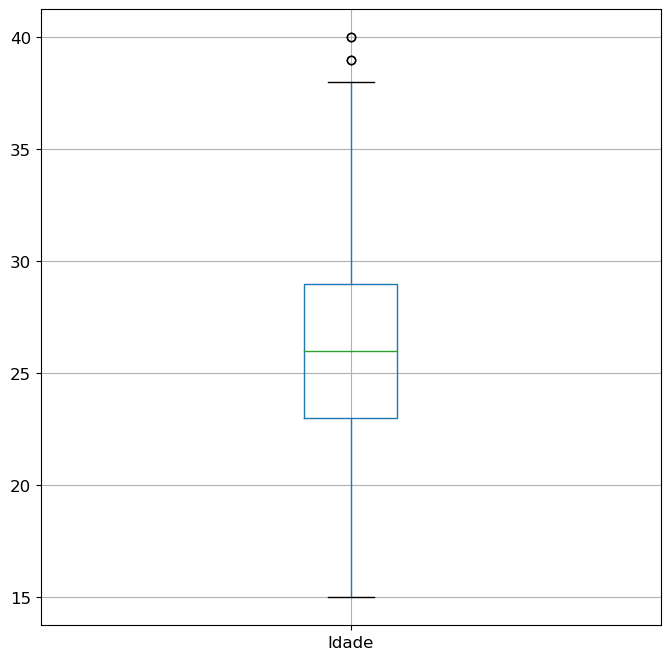

In [85]:
# Fazendo um boxplot para Idade para todos os Jogadores
df3_soccer.boxplot(column=['Idade'], fontsize='large', figsize=(8,8))

In [86]:
# desvio de Minutos jogados para todos os Jogadores
dv_Gols = df3_soccer['Minutos jogados'].apply(lambda x: x - media_Minutos_jogados)
print("Desvio de Minutos jogados:")
dv_Gols

Desvio de Minutos jogados:


1       339.583514
2      -283.416486
3      -509.416486
4      -466.416486
5       638.583514
           ...    
2301    798.583514
2302    907.583514
2303    714.583514
2304    285.583514
2305     72.583514
Name: Minutos jogados, Length: 2305, dtype: float64

In [87]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Minutos jogados
desvio_absoluto_Minutos_jogados=df3_soccer['Minutos jogados'].mad()
print("Desvio Absoluto de Minutos jogados:",+ desvio_absoluto_Minutos_jogados)

variancia_Minutos_jogados=df3_soccer['Minutos jogados'].var()
print("Variância de Minutos jogados:",+ variancia_Minutos_jogados)

desvio_padrao_Minutos_jogados=df3_soccer['Minutos jogados'].std()
print("Desvio Padrão de Minutos jogados.:",+desvio_padrao_Minutos_jogados)

Desvio Absoluto de Minutos jogados: 408.0448558024854
Variância de Minutos jogados: 217764.8342767079
Desvio Padrão de Minutos jogados.: 466.6527984237402


C:\Users\user\AppData\Local\Temp\ipykernel_9444\1049550794.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Minutos_jogados=df3_soccer['Minutos jogados'].mad()


<Axes: >

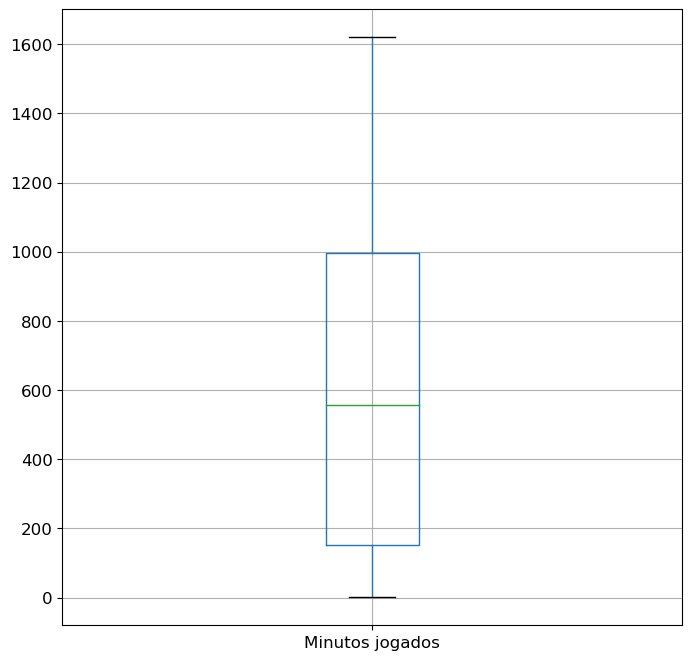

In [88]:
# Fazendo um boxplot para Minutos jogados para todos os Jogadores
df3_soccer.boxplot(column=['Minutos jogados'], fontsize='large', figsize=(8,8))

In [89]:
# desvio de Gols para todos os Jogadores
dv_Gols = df3_soccer['Gols'].apply(lambda x: x - media_Gols)
print("Desvio de Gols:")
dv_Gols

Desvio de Gols:


1      -0.933333
2      -0.933333
3      -0.933333
4       2.066667
5      -0.933333
          ...   
2301   -0.933333
2302    2.066667
2303    3.066667
2304    3.066667
2305   -0.933333
Name: Gols, Length: 2305, dtype: float64

In [90]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Gols
desvio_absoluto_gols=df3_soccer['Gols'].mad()
print("Desvio Absoluto de Gols:",+ desvio_absoluto_gols)

variancia_gols=df3_soccer['Gols'].var()
print("Variância de Gols:",+ variancia_gols)

desvio_padrao_gols=df3_soccer['Gols'].std()
print("Desvio Padrão de Gols.:",+desvio_padrao_gols)

Desvio Absoluto de Gols: 1.1360217578498126
Variância de Gols: 3.3128720776090868
Desvio Padrão de Gols.: 1.820129687030319


C:\Users\user\AppData\Local\Temp\ipykernel_9444\4074109963.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_gols=df3_soccer['Gols'].mad()


<Axes: >

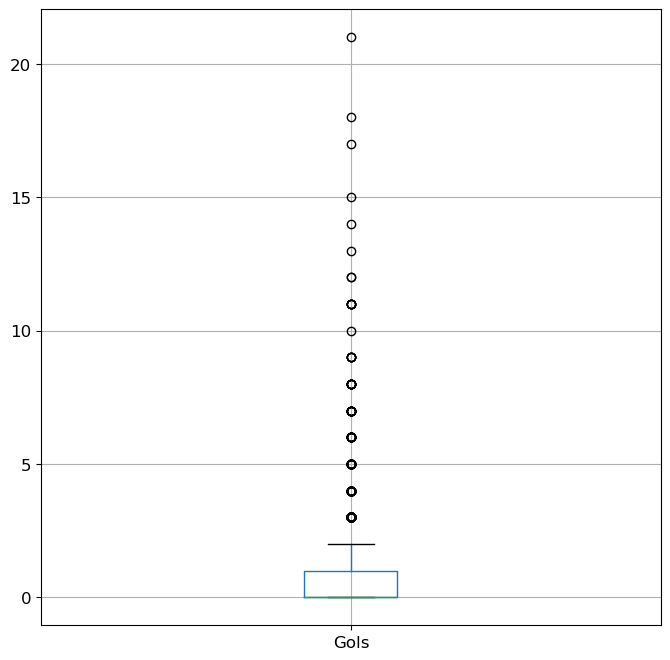

In [91]:
# Fazendo um boxplot para Gols para todos os Jogadores
df3_soccer.boxplot(column=['Gols'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Gols'}, xlabel='Posição'>

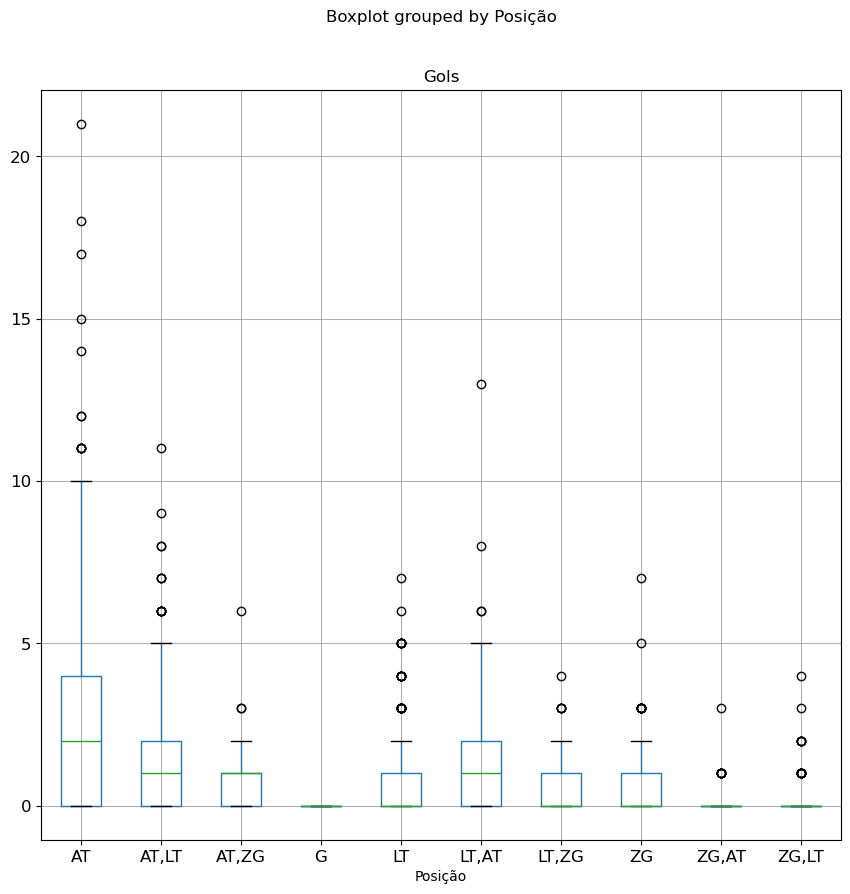

In [92]:
# Fazendo um boxplot para Gols por Posição
df3_soccer.boxplot(by='Posição', column=['Gols'], fontsize='large', figsize=(10,10))

In [93]:
# desvio de Assistências para todos os Jogadores
dv_Assistencias = df3_soccer['Assistências'].apply(lambda x: x - media_Assistencias)
print("Desvio de Assistências:")
dv_Assistencias

Desvio de Assistências:


1       0.6
2      -0.4
3       0.6
4      -0.4
5      -0.4
       ... 
2301    0.6
2302    0.6
2303    2.6
2304    0.6
2305   -0.4
Name: Assistências, Length: 2305, dtype: float64

In [94]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Assistências
desvio_absoluto_Assistencia=df3_soccer['Assistências'].mad()
print("Desvio Absoluto de Assistências:",+ desvio_absoluto_Assistencia)

variancia_Assistencia=df3_soccer['Assistências'].var()
print("Variância de Assistências:",+ variancia_Assistencia)

desvio_padrao_Assistencia=df3_soccer['Assistências'].std()
print("Desvio Padrão de Assistências:",+ desvio_padrao_Assistencia)

Desvio Absoluto de Assistências: 0.8515630925884972
Variância de Assistências: 1.3805423746685983
Desvio Padrão de Assistências: 1.1749648397584493


C:\Users\user\AppData\Local\Temp\ipykernel_9444\2426850523.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Assistencia=df3_soccer['Assistências'].mad()


<Axes: >

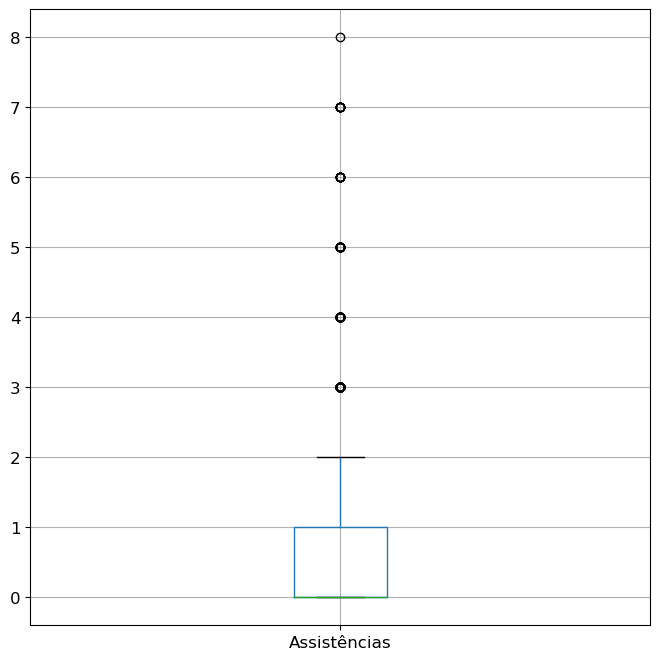

In [95]:
# Fazendo um boxplot para Assistências para todos os Jogadores
df3_soccer.boxplot(column=['Assistências'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Assistências'}, xlabel='Posição'>

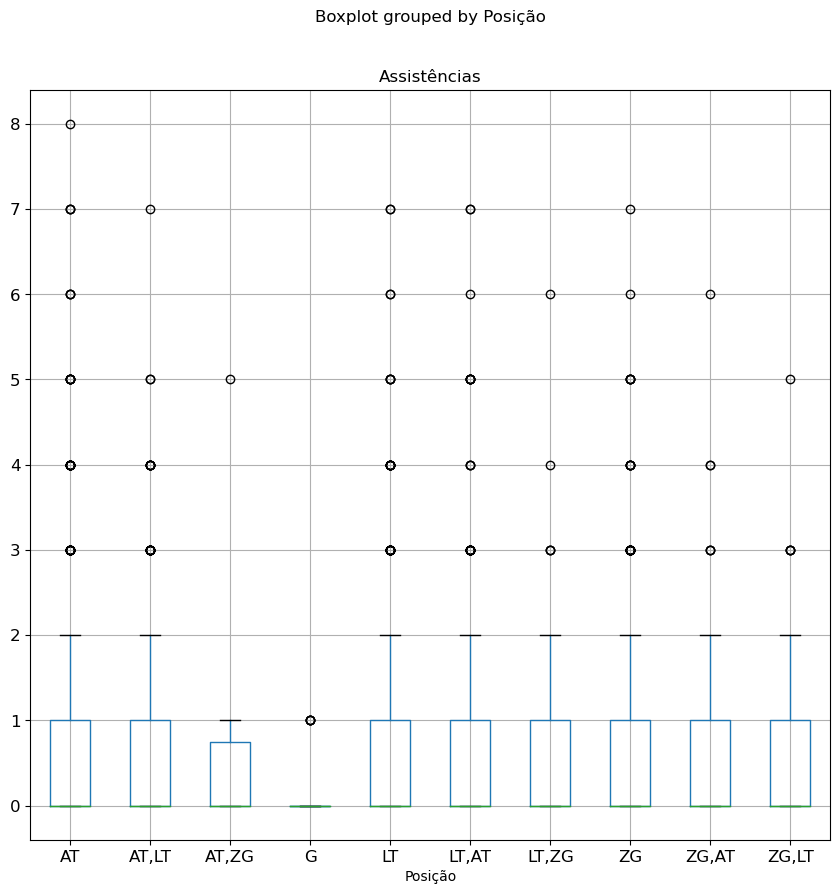

In [96]:
# Fazendo um boxplot para Assistências por Posição
df3_soccer.boxplot(by='Posição', column=['Assistências'], fontsize='large', figsize=(10,10))

In [97]:
# Desvio para Cartões Amarelos para todos os Jogadores
dv_Cartões_Amarelos = df3_soccer['Cartões Amarelos'].apply(lambda x: x - media_Cartões_Amarelos)
print("Desvio de Cartões Amarelos:")
dv_Cartões_Amarelos

Desvio de Cartões Amarelos:


1       0.033333
2       1.033333
3      -0.966667
4       2.033333
5       1.033333
          ...   
2301    5.033333
2302    2.033333
2303    0.033333
2304    1.033333
2305    0.033333
Name: Cartões Amarelos, Length: 2305, dtype: float64

In [98]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Cartões Amarelos
desvio_absoluto_Cartões_Amarelos=df3_soccer['Cartões Amarelos'].mad()
print("Desvio Absoluto de Cartões Amarelos:",+ desvio_absoluto_Cartões_Amarelos)

variancia_Cartões_Amarelos=df3_soccer['Cartões Amarelos'].var()
print("Variância de Cartões Amarelos:",+ variancia_Cartões_Amarelos)

desvio_padrao_Cartões_Amarelos=df3_soccer['Cartões Amarelos'].std()
print("Desvio Padrão de Cartões Amarelos:",+ desvio_padrao_Cartões_Amarelos)

Desvio Absoluto de Cartões Amarelos: 1.3117555441579891
Variância de Cartões Amarelos: 2.6282285641119114
Desvio Padrão de Cartões Amarelos: 1.6211812249443032


C:\Users\user\AppData\Local\Temp\ipykernel_9444\1693690532.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Cartões_Amarelos=df3_soccer['Cartões Amarelos'].mad()


<Axes: >

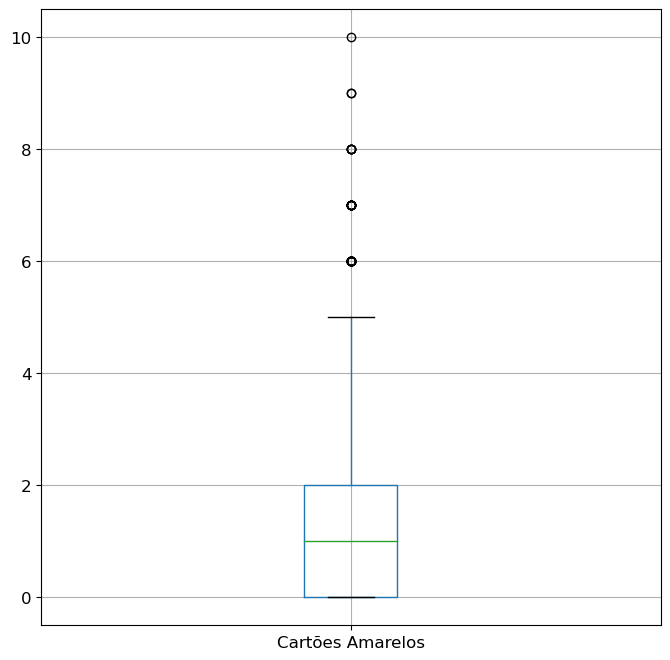

In [99]:
# Fazendo um boxplot para Cartões Amarelos para todos os Jogadores
df3_soccer.boxplot(column=['Cartões Amarelos'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Cartões Amarelos'}, xlabel='Posição'>

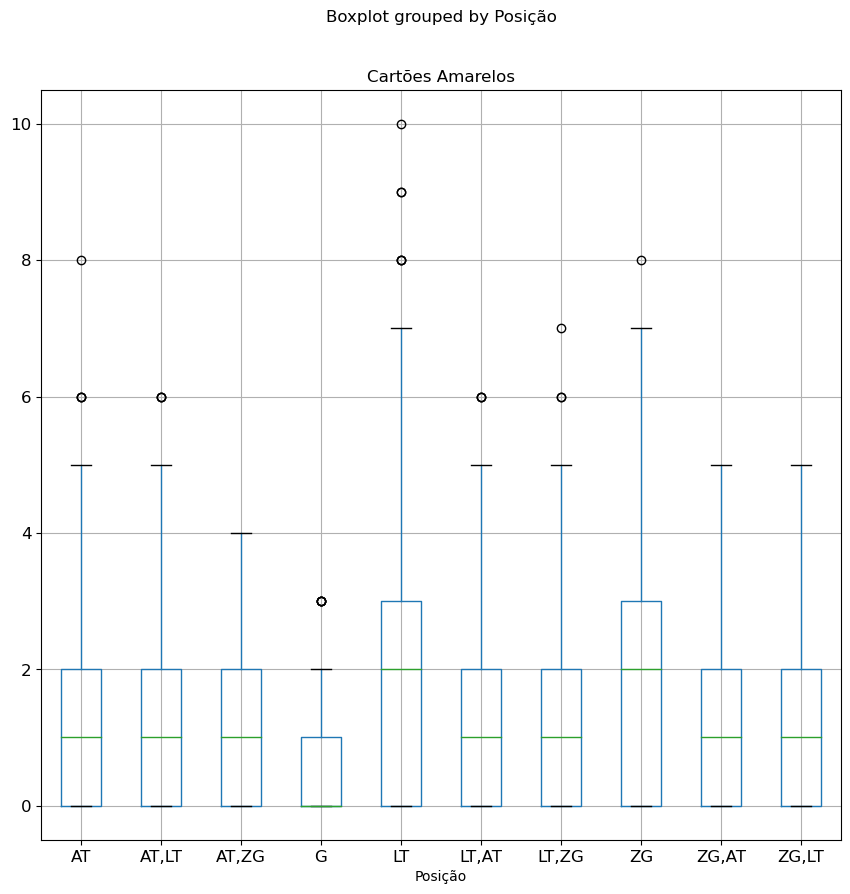

In [100]:
# Fazendo um boxplot para Cartões Amarelos por Posição
df3_soccer.boxplot(by='Posição', column=['Cartões Amarelos'], fontsize='large', figsize=(10,10))

In [101]:
# Desvio de Cartões Vermelhos para todos os jogadores
dv_Cartões_Vermelhos = df3_soccer['Cartões Vermelhos'].apply(lambda x: x - media_Cartões_Vermelhos)
print("Desvio de Cartões Vermelhos:")
dv_Cartões_Vermelhos

Desvio de Cartões Vermelhos:


1       0.033333
2       1.033333
3      -0.966667
4       2.033333
5       1.033333
          ...   
2301    5.033333
2302    2.033333
2303    0.033333
2304    1.033333
2305    0.033333
Name: Cartões Vermelhos, Length: 2305, dtype: float64

In [102]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Cartões Vermelhos
desvio_absoluto_Cartões_Vermelhos=df3_soccer['Cartões Vermelhos'].mad()
print("Desvio Absoluto de Cartões Vermelhos:",+ desvio_absoluto_Cartões_Vermelhos)

variancia_Cartões_Vermelhos=df3_soccer['Cartões Vermelhos'].var()
print("Variância de Cartões Vermelhos:",+ variancia_Cartões_Vermelhos)

desvio_padrao_Cartões_Vermelhos=df3_soccer['Cartões Vermelhos'].std()
print("Desvio Padrão de Cartões Vermelhos:",+ desvio_padrao_Cartões_Vermelhos)

Desvio Absoluto de Cartões Vermelhos: 1.3117555441579891
Variância de Cartões Vermelhos: 2.6282285641119114
Desvio Padrão de Cartões Vermelhos: 1.6211812249443032


C:\Users\user\AppData\Local\Temp\ipykernel_9444\1585014853.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Cartões_Vermelhos=df3_soccer['Cartões Vermelhos'].mad()


<Axes: >

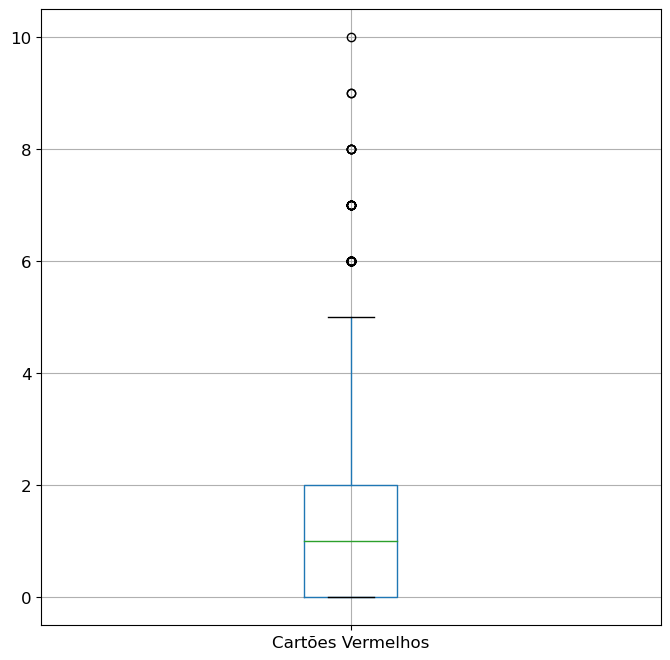

In [103]:
# Fazendo um boxplot para Cartões Vermelhos para todos os Jogadores
df3_soccer.boxplot(column=['Cartões Vermelhos'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Cartões Vermelhos'}, xlabel='Posição'>

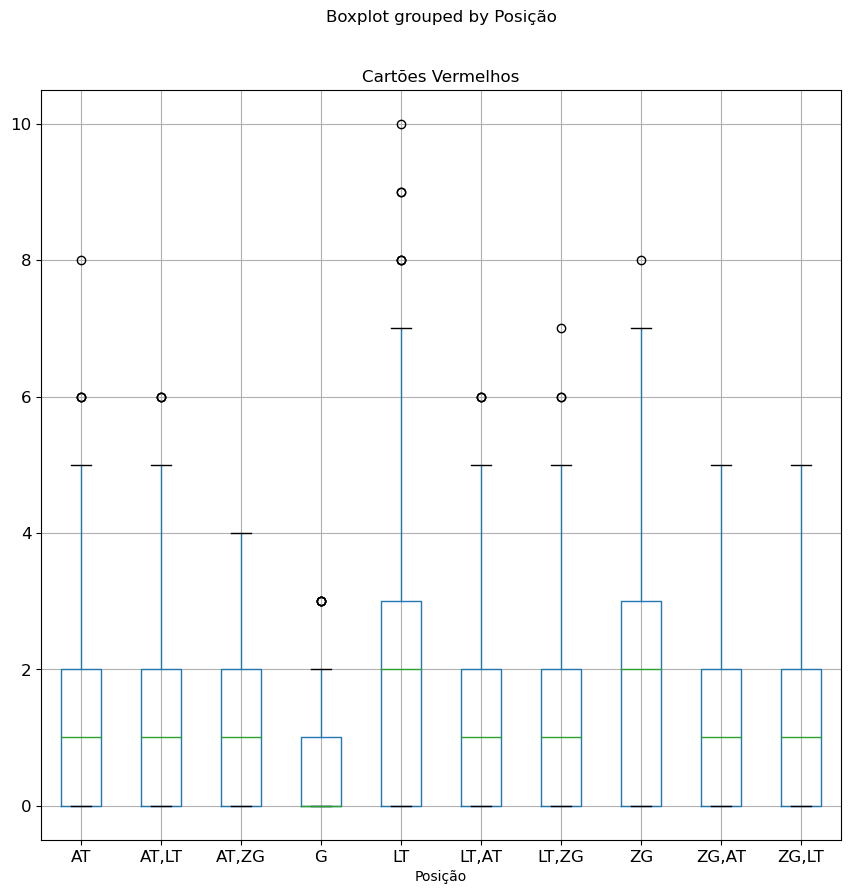

In [104]:
# Fazendo um boxplot para Cartões Vermelhos Recebidos por Posição
df3_soccer.boxplot(by='Posição', column=['Cartões Vermelhos'], fontsize='large', figsize=(10,10))

In [105]:
# Desvio de Carregada Progressiva para todos os Jogadores
dv_Carregada_Progressiva = df3_soccer['Carregada Progressiva'].apply(lambda x: x - media_Carregada_Progressiva)
print("Desvio de Carregada Progressiva:")
dv_Carregada_Progressiva

Desvio de Carregada Progressiva:


1        4.566667
2       -7.433333
3       -9.433333
4       11.566667
5       -4.433333
          ...    
2301    -0.433333
2302    13.566667
2303    20.566667
2304    -9.433333
2305     2.566667
Name: Carregada Progressiva, Length: 2305, dtype: float64

In [106]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Carregada Progressiva
desvio_absoluto_Carregada_Progressiva=df3_soccer['Carregada Progressiva'].mad()
print("Desvio Absoluto de Carregada Progressiva:",+ desvio_absoluto_Carregada_Progressiva)

variancia_Carregada_Progressiva=df3_soccer['Carregada Progressiva'].var()
print("Variância de Carregada Progressiva:",+ variancia_Carregada_Progressiva)

desvio_padrao_Carregada_Progressiva=df3_soccer['Carregada Progressiva'].std()
print("Desvio Padrão de Carregada Progressiva:",+ desvio_padrao_Carregada_Progressiva)

Desvio Absoluto de Carregada Progressiva: 10.374959651046249
Variância de Carregada Progressiva: 211.42408562304058
Desvio Padrão de Carregada Progressiva: 14.54042934796083


C:\Users\user\AppData\Local\Temp\ipykernel_9444\3336668624.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Carregada_Progressiva=df3_soccer['Carregada Progressiva'].mad()


<Axes: >

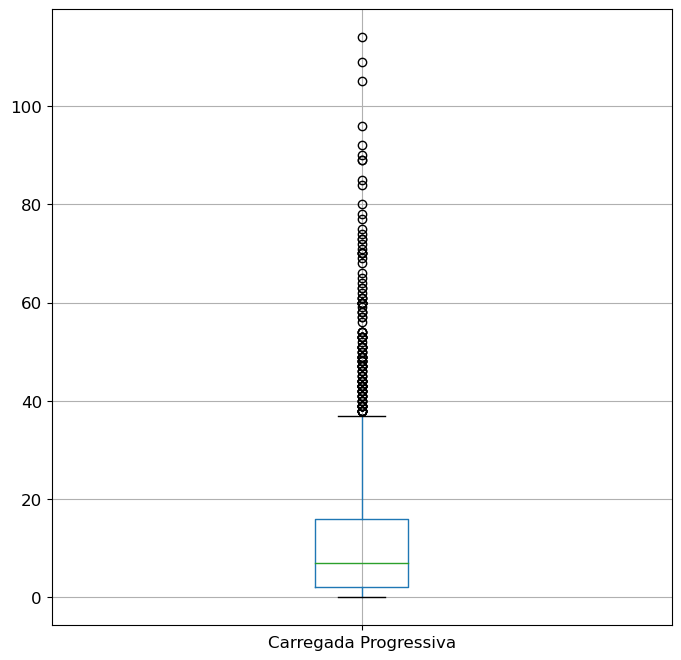

In [107]:
# Fazendo um boxplot para Carregada Progressiva para todos os Jogadores
df3_soccer.boxplot(column=['Carregada Progressiva'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Carregada Progressiva'}, xlabel='Posição'>

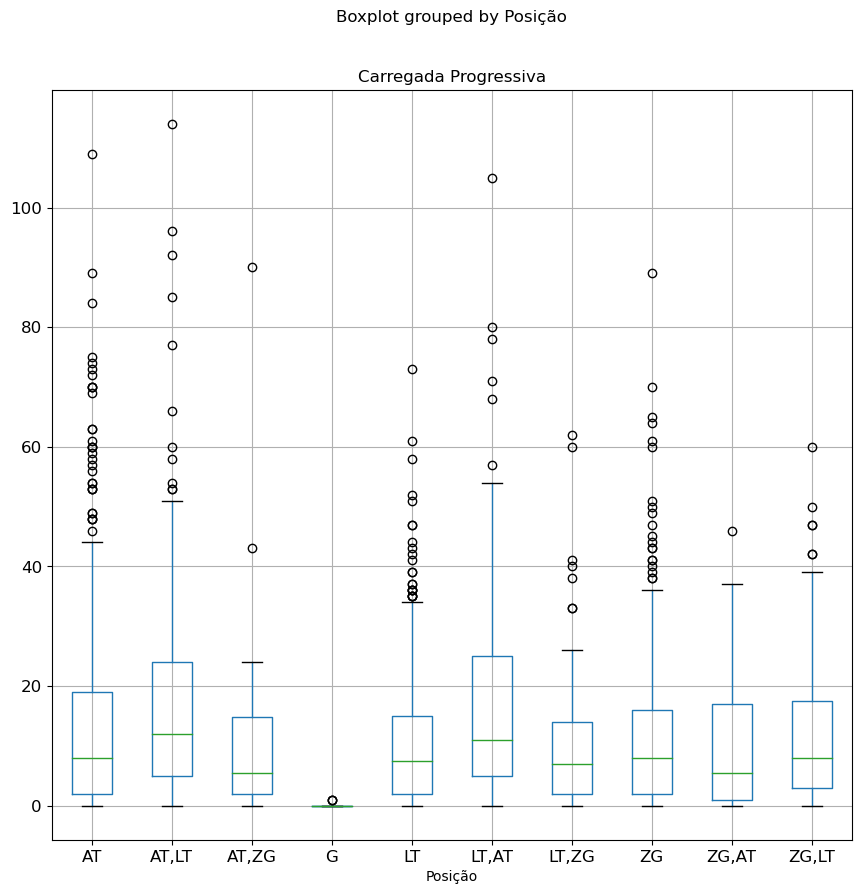

In [108]:
# Fazendo um boxplot para Carregada Progressiva por Posição
df3_soccer.boxplot(by='Posição', column=['Carregada Progressiva'], fontsize='large', figsize=(10,10))

In [109]:
# Desvio de Passes Progressivos para todos os Jogadores
dv_Passes_Progressivos = df3_soccer['Passes Progressivos'].apply(lambda x: x - media_Passes_Progressivos)
print("Desvio de Passes Progressivos:")
dv_Passes_Progressivos

Desvio de Passes Progressivos:


1        23.0
2         1.0
3        -3.0
4        66.0
5        61.0
        ...  
2301     62.0
2302     74.0
2303    104.0
2304      3.0
2305     21.0
Name: Passes Progressivos, Length: 2305, dtype: float64

In [110]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Passes Progressivos
desvio_absoluto_Passes_Progressivos=df3_soccer['Passes Progressivos'].mad()
print("Desvio Absoluto de Passes Progressivos:",+ desvio_absoluto_Passes_Progressivos)

variancia_Passes_Progressivos=df3_soccer['Passes Progressivos'].var()
print("Variância de Passes Progressivos:",+ variancia_Passes_Progressivos)

desvio_padrao_Passes_Progressivos=df3_soccer['Passes Progressivos'].std()
print("Desvio Padrão de Passes Progressivos:",+ desvio_padrao_Passes_Progressivos)

Desvio Absoluto de Passes Progressivos: 20.930359635047832
Variância de Passes Progressivos: 719.6432318028405
Desvio Padrão de Passes Progressivos: 26.826166923413425


C:\Users\user\AppData\Local\Temp\ipykernel_9444\3403940705.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Passes_Progressivos=df3_soccer['Passes Progressivos'].mad()


<Axes: >

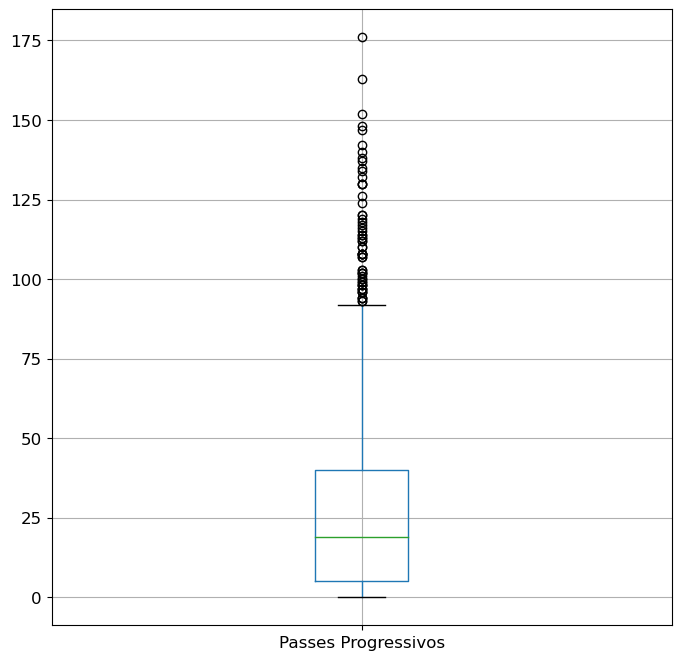

In [111]:
# Fazendo um boxplot para Passes Progressivos para todos os Jogadores
df3_soccer.boxplot(column=['Passes Progressivos'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Passes Progressivos'}, xlabel='Posição'>

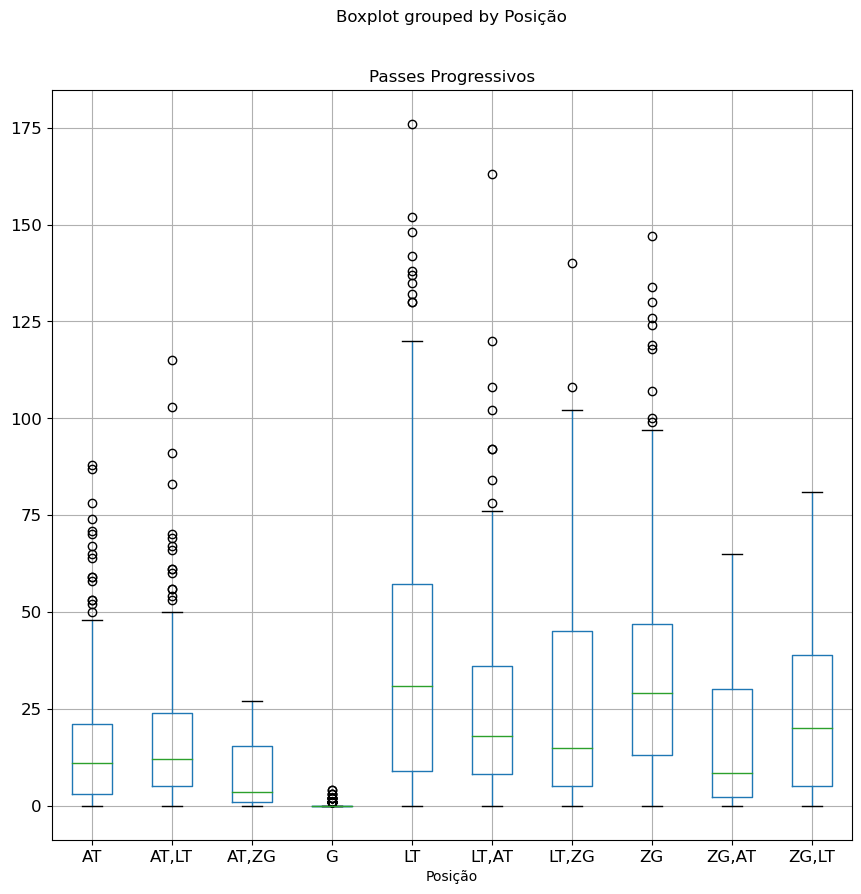

In [112]:
# Fazendo um boxplot para Passes Progressivos por Posição
df3_soccer.boxplot(by='Posição', column=['Passes Progressivos'], fontsize='large', figsize=(10,10))

In [113]:
# Desvio de Passes Progressivos Recebidos para todos os Jogadores
dv_Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos'].apply(lambda x: x - media_Passes_Progressivos_Recebidos)
print("Desvio de Passes Progressivos Recebidos:")
dv_Passes_Progressivos_Recebidos

Desvio de Passes Progressivos Recebidos:


1       -9.2
2      -10.2
3      -21.2
4      -24.2
5      -11.2
        ... 
2301   -28.2
2302   -14.2
2303    46.8
2304    -2.2
2305   -17.2
Name: Passes Progressivos Recebidos, Length: 2305, dtype: float64

In [114]:
# Calculando o desvio Absoluto, Variância e desvio padrao para Passes Progressivos Recebidos
desvio_absoluto_Passes_Progressivos_Recebidos=df3_soccer['Passes Progressivos Recebidos'].mad()
print("Desvio Absoluto de Passes Progressivos Recebidos:",+ desvio_absoluto_Passes_Progressivos_Recebidos)

variancia_Passes_Progressivos_Recebidos=df3_soccer['Passes Progressivos Recebidos'].var()
print("Variância de Passes Progressivos Recebidos:",+ variancia_Passes_Progressivos_Recebidos)

desvio_padrao_Passes_Progressivos_Recebidos=df3_soccer['Passes Progressivos'].std()
print("Desvio Padrão de Passes Progressivos Recebidos:",+ desvio_padrao_Passes_Progressivos_Recebidos)

Desvio Absoluto de Passes Progressivos Recebidos: 24.206903223681426
Variância de Passes Progressivos Recebidos: 1023.6356738822594
Desvio Padrão de Passes Progressivos Recebidos: 26.826166923413425


C:\Users\user\AppData\Local\Temp\ipykernel_9444\2762446694.py:2: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  desvio_absoluto_Passes_Progressivos_Recebidos=df3_soccer['Passes Progressivos Recebidos'].mad()


<Axes: >

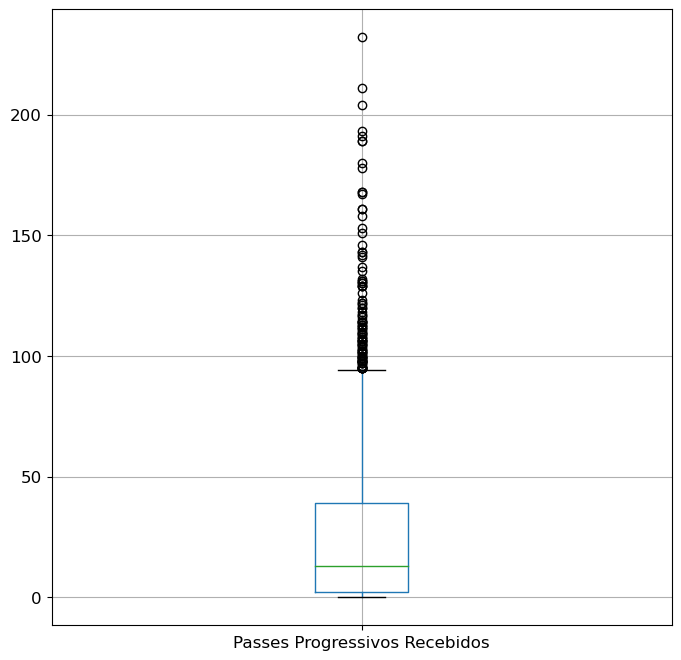

In [115]:
# Fazendo um boxplot para Passes Progressivos Recebidos de todos os jogadores
df3_soccer.boxplot(column=['Passes Progressivos Recebidos'], fontsize='large', figsize=(8,8))

<Axes: title={'center': 'Passes Progressivos Recebidos'}, xlabel='Posição'>

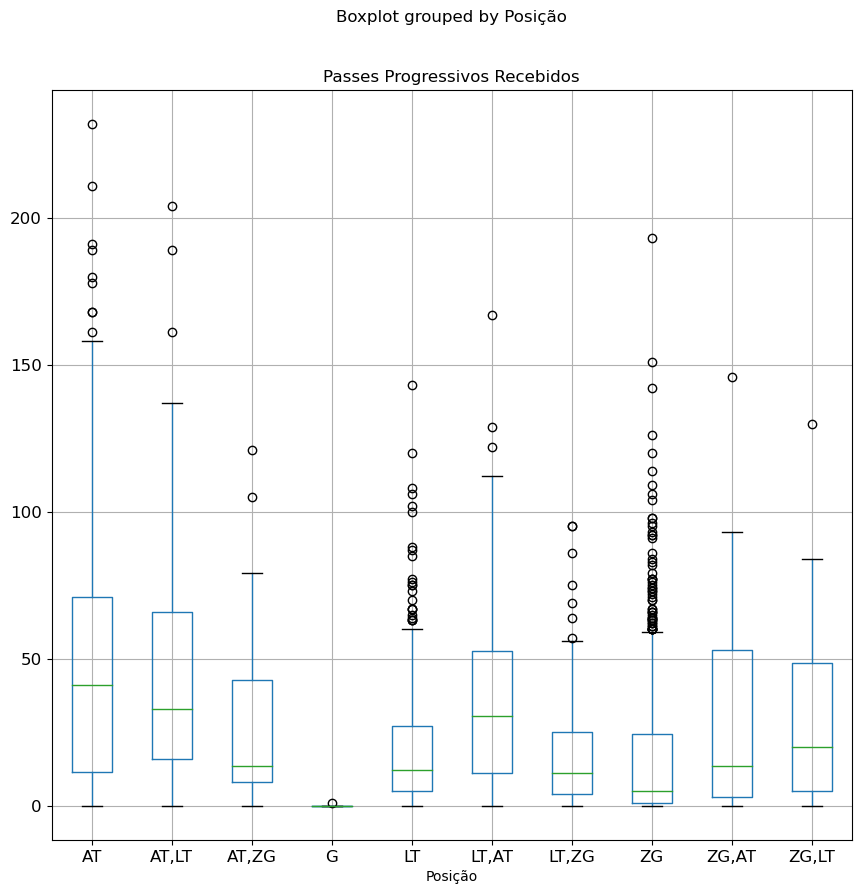

In [116]:
# Fazendo um boxplot para Passes Progressivos Recebidos por Posição
df3_soccer.boxplot(by='Posição', column=['Passes Progressivos Recebidos'], fontsize='large', figsize=(10,10))

## TABELA DE HISTOGRAMA 

Tabela de Histograma para Idade , Minutos jogados, Gols, Assistências , Cartões Amarelos , Cartões Vermelhos, Carregadas Progressivas , Passes Progressivos , Passes Progressivos Recebidos. K será Calculado usando a Regra de Sturges.

## K SENDO CALCULADO k = [1 + 3,3 log10(tamanho_do_dataset)]

In [117]:
# K SENDO CALCULADO k = [1 + 3,3 log10(tamanho_do_dataset)]
k = math.ceil(1 + 3.3 * math.log10(df3_soccer.size))
print(k)

18


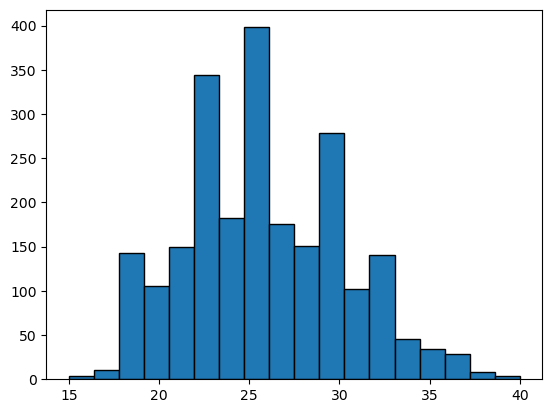

In [118]:
# Histograma de Idade para todos os Jogadores
plt.hist(df3_soccer['Idade'], bins=k,edgecolor='black' )
plt.show()

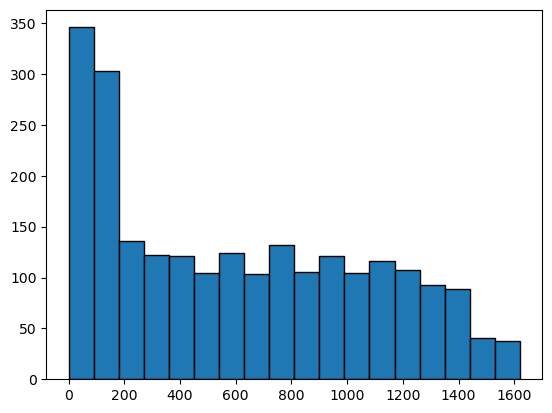

In [119]:
# Histograma de Minutos jogados para todos os Jogadores
plt.hist(df3_soccer['Minutos jogados'], bins=k,edgecolor='black' )
plt.show()

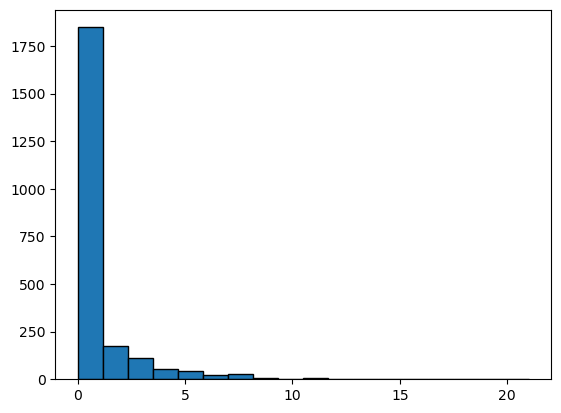

In [120]:
# Histograma de Gols para todos os Jogadores
plt.hist(df3_soccer['Gols'], bins=k,edgecolor='black' )
plt.show()

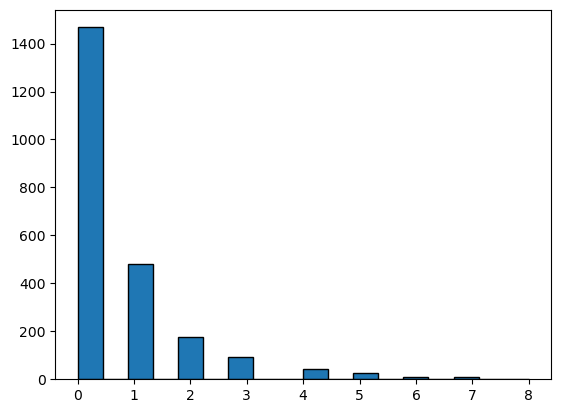

In [121]:
# Histograma de Assistências para todos os Jogadores
plt.hist(df3_soccer['Assistências'], bins=k,edgecolor='black' )
plt.show()

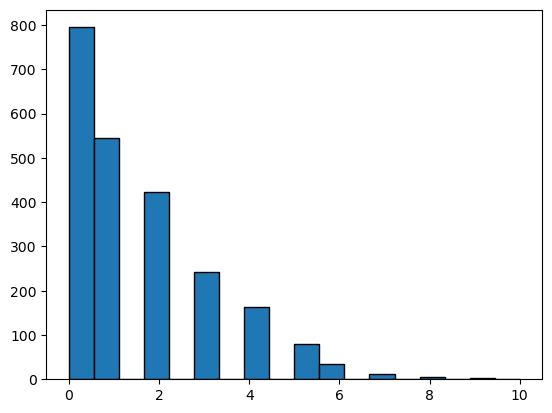

In [122]:
# Histograma de Cartões Amarelos para todos os Jogadores
plt.hist(df3_soccer['Cartões Amarelos'], bins=k,edgecolor='black' )
plt.show()

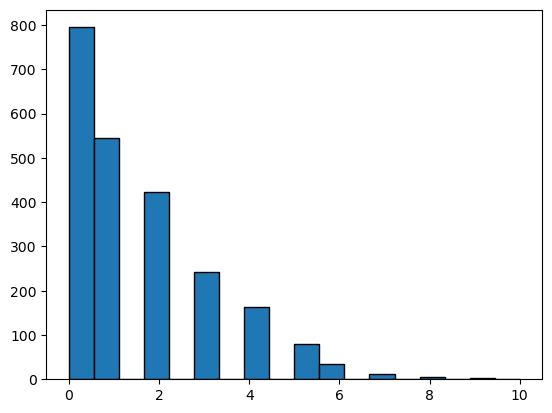

In [123]:
# Histograma de Cartões Vermelhos para todos os Jogadores
plt.hist(df3_soccer['Cartões Vermelhos'], bins=k,edgecolor='black' )
plt.show()

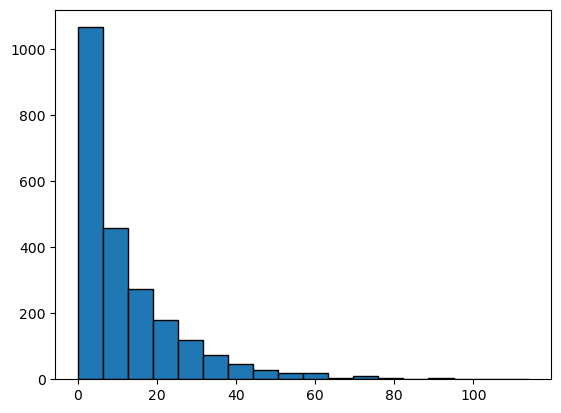

In [124]:
# Histograma de Carregadas Progressivas para todos os Jogadores
plt.hist(df3_soccer['Carregada Progressiva'], bins=k,edgecolor='black' )
plt.show()

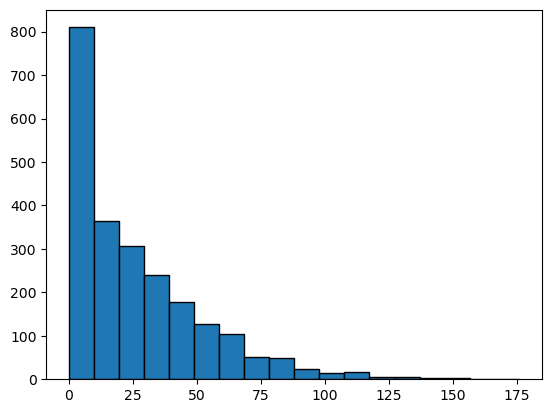

In [125]:
# Histograma de Passes Progressivos para todos os Jogadores
plt.hist(df3_soccer['Passes Progressivos'], bins=k,edgecolor='black' )
plt.show()

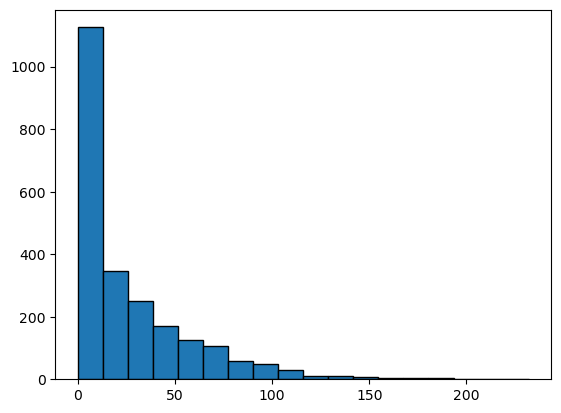

In [126]:
# Histograma de Passes Progressivos Recebidos para todos os Jogadores
plt.hist(df3_soccer['Passes Progressivos Recebidos'], bins=k,edgecolor='black' )
plt.show()

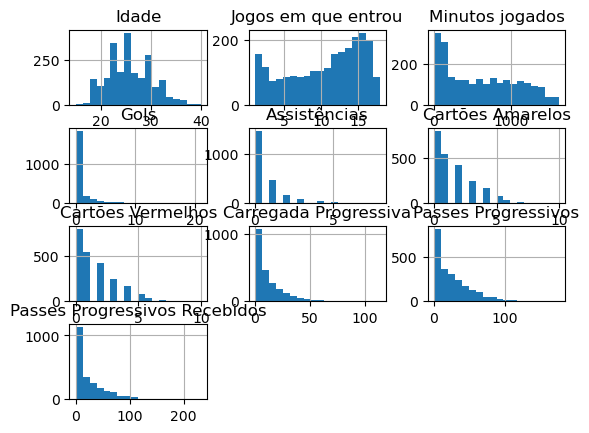

In [127]:
hist = df3_soccer.hist(bins=k)

## TABELA DE FREQUÊNCIA DE DADOS NÂO AGRUPADOS

Vou fazer a tabela de Frequência para posição , Nacionalidade , Liga e depois para Idade, Gols, Assistências , Cartões 
Amarelos e Cartões Vermelhos. 

In [128]:
# tabela de Frequência para a Nacionalidade dos Jogadores
# Calcular a quantidade exata de jogadores de cada Nacionalidade
freq_table = pd.crosstab(df3_soccer['Nacionalidade'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Nacionalidade,,,,
,2,0.000868,0.086768,0.086768
ALB,14,0.006074,0.607375,0.694143
ALG,23,0.009978,0.997831,1.691974
ANG,3,0.001302,0.130152,1.822126
ARG,65,0.028200,2.819957,4.642082
...,...,...,...,...
ZIM,4,0.001735,0.173536,90.759219
ENG,176,0.076356,7.635575,98.394794
NIR,2,0.000868,0.086768,98.481562


In [129]:
# tabela de Frequência para a Posição dos Jogadores
# Calcular a quantidade exata de jogadores de  cada Posição
freq_table = pd.crosstab(df3_soccer['Posição'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Posição,,,,
AT,323,0.140130,14.013015,14.013015
"AT,LT",224,0.097180,9.718004,23.731020
"AT,ZG",30,0.013015,1.301518,25.032538
G,148,0.064208,6.420824,31.453362
LT,488,0.211714,21.171367,52.624729
"LT,AT",206,0.089371,8.937093,61.561822
"LT,ZG",57,0.024729,2.472885,64.034707
ZG,699,0.303254,30.325380,94.360087
"ZG,AT",42,0.018221,1.822126,96.182213


In [130]:
# tabela de Frequência para a Liga dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Liga'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Liga,,,,
Bundesliga,434,0.188286,18.828633,18.828633
La Liga,457,0.198265,19.826464,38.655098
Ligue 1,433,0.187852,18.785249,57.440347
Serie A,493,0.213883,21.388286,78.828633
Premier League,488,0.211714,21.171367,100.000000


In [131]:
# tabela de Frequência para a Idade dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Idade'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Idade,,,,
15.0,1,0.000434,0.043384,0.043384
16.0,3,0.001302,0.130152,0.173536
17.0,10,0.004338,0.433839,0.607375
18.0,48,0.020824,2.082430,2.689805
19.0,95,0.041215,4.121475,6.811280
20.0,105,0.045553,4.555315,11.366594
21.0,149,0.064642,6.464208,17.830803
22.0,162,0.070282,7.028200,24.859002
23.0,182,0.078959,7.895879,32.754881


In [132]:
# tabela de Frequência para a Gols dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Gols'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Gols,,,,
0,1392,0.603905,60.390456,60.390456
1,456,0.197831,19.783080,80.173536
2,176,0.076356,7.635575,87.809111
3,114,0.049458,4.945770,92.754881
4,53,0.022993,2.299349,95.054230
5,41,0.017787,1.778742,96.832972
6,24,0.010412,1.041215,97.874187
7,18,0.007809,0.780911,98.655098
8,11,0.004772,0.477223,99.132321


In [133]:
# tabela de Frequência para a Assistências dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Assistências'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Assistências,,,,
0,1468,0.636876,63.687636,63.687636
1,480,0.208243,20.824295,84.511931
2,176,0.076356,7.635575,92.147505
3,91,0.039479,3.947939,96.095445
4,44,0.019089,1.908894,98.004338
5,27,0.011714,1.171367,99.175705
6,9,0.003905,0.390456,99.566161
7,9,0.003905,0.390456,99.956616
8,1,0.000434,0.043384,100.000000


In [134]:
# tabela de Frequência para a Cartões Amarelos dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Cartões Amarelos'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Cartões Amarelos,,,,
0,795,0.344902,34.490239,34.490239
1,545,0.236443,23.644252,58.134490
2,424,0.183948,18.394794,76.529284
3,242,0.104989,10.498915,87.028200
4,164,0.071150,7.114967,94.143167
5,80,0.034707,3.470716,97.613883
6,34,0.014751,1.475054,99.088937
7,13,0.005640,0.563991,99.652928
8,5,0.002169,0.216920,99.869848


In [135]:
# tabela de Frequência para a Cartões Vermelhos dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Cartões Vermelhos'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Cartões Vermelhos,,,,
0,795,0.344902,34.490239,34.490239
1,545,0.236443,23.644252,58.134490
2,424,0.183948,18.394794,76.529284
3,242,0.104989,10.498915,87.028200
4,164,0.071150,7.114967,94.143167
5,80,0.034707,3.470716,97.613883
6,34,0.014751,1.475054,99.088937
7,13,0.005640,0.563991,99.652928
8,5,0.002169,0.216920,99.869848


In [136]:
# tabela de Frequência para a Carregada Progressiva dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Carregada Progressiva'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Carregada Progressiva,,,,
0.0,396,0.171800,17.180043,17.180043
1.0,162,0.070282,7.028200,24.208243
2.0,130,0.056399,5.639913,29.848156
3.0,105,0.045553,4.555315,34.403471
4.0,70,0.030369,3.036876,37.440347
...,...,...,...,...
92.0,1,0.000434,0.043384,99.826464
96.0,1,0.000434,0.043384,99.869848
105.0,1,0.000434,0.043384,99.913232


In [137]:
# tabela de Frequência para a Passes Progressivos dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Passes Progressivos'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Passes Progressivos,,,,
0.0,261,0.113232,11.323210,11.323210
1.0,126,0.054664,5.466377,16.789588
2.0,86,0.037310,3.731020,20.520607
3.0,63,0.027332,2.733189,23.253796
4.0,39,0.016920,1.691974,24.945770
...,...,...,...,...
147.0,1,0.000434,0.043384,99.826464
148.0,1,0.000434,0.043384,99.869848
152.0,1,0.000434,0.043384,99.913232


In [138]:
# tabela de Frequência para a Passes Progressivos Recebidos dos Jogadores
# Calcular a quantidade exata de jogadores em cada liga
freq_table = pd.crosstab(df3_soccer['Passes Progressivos Recebidos'], 'Quantidade Exata')
# Calcular a frequência relativa
freq_table['Frequência Relativa'] = freq_table['Quantidade Exata'] / len(df3_soccer)
# Calcular a frequência Percentual
freq_table['Frequência Percentual'] = freq_table['Frequência Relativa'] * 100
# Calcular a porcentagem acumulada
freq_table['Porcentagem Acumulada'] = freq_table['Frequência Percentual'].cumsum()
freq_table

col_0,Quantidade Exata,Frequência Relativa,Frequência Percentual,Porcentagem Acumulada
Passes Progressivos Recebidos,,,,
0.0,370,0.160521,16.052061,16.052061
1.0,150,0.065076,6.507592,22.559653
2.0,98,0.042516,4.251627,26.811280
3.0,78,0.033839,3.383948,30.195228
4.0,62,0.026898,2.689805,32.885033
...,...,...,...,...
191.0,1,0.000434,0.043384,99.826464
193.0,1,0.000434,0.043384,99.869848
204.0,1,0.000434,0.043384,99.913232


## QQ-PLOT

Vou fazer o QQ-PLOT para Idade, Minutos jogados, Gols, Assistência , Cartões Amarelos , Cartões Vermelhos, 
Carregadas Progressivas , passes Progressivos , Passes Progressivos Recebidos e Jogos em que entrou.

In [139]:
import statsmodels.api as sm

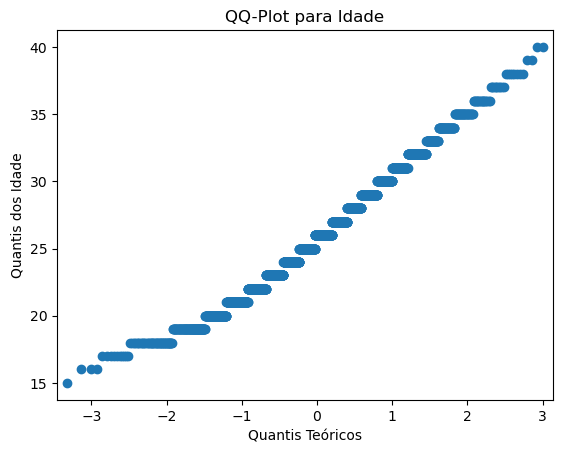

In [140]:
# Selecionar a coluna de Idade do DataFrame
idade = df3_soccer['Idade']

# Criar o QQ-Plot
sm.qqplot(idade, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Idade')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Idade')

# Exibir o gráfico
plt.show()

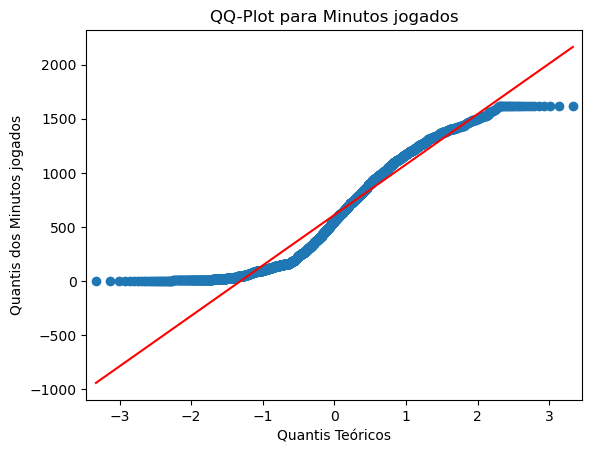

In [141]:
# Selecionar a coluna de gols do DataFrame
minutos_jogados = df3_soccer['Minutos jogados']

# Criar o QQ-Plot
sm.qqplot(minutos_jogados, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Minutos jogados')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Minutos jogados')

# Exibir o gráfico
plt.show()

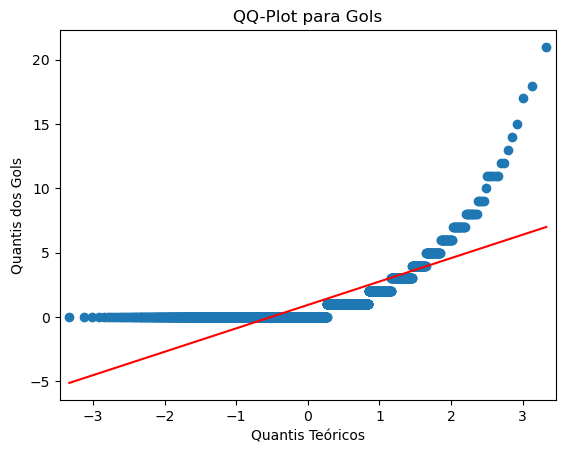

In [142]:
# Selecionar a coluna de Gols do DataFrame
x = df3_soccer['Gols']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Gols')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Gols')

# Exibir o gráfico
plt.show()

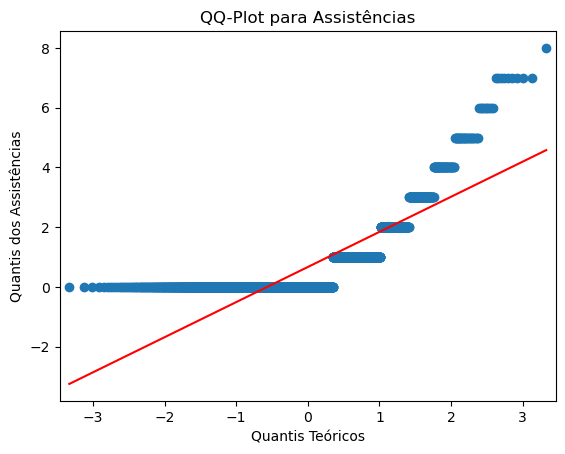

In [143]:
# Selecionar a coluna de Assistências do DataFrame
x = df3_soccer['Assistências']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Assistências')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Assistências')

# Exibir o gráfico
plt.show()

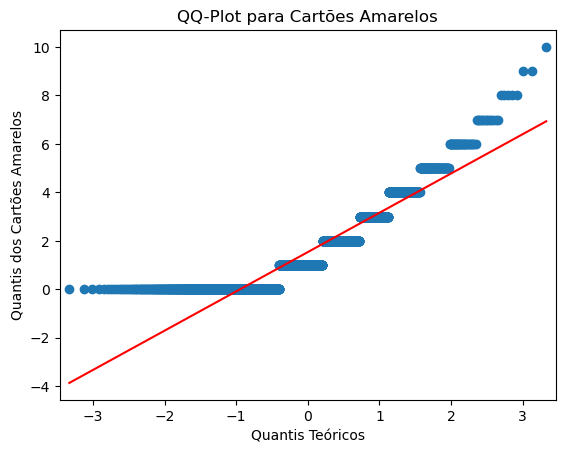

In [144]:
# Selecionar a coluna de Cartões Amarelos do DataFrame
x = df3_soccer['Cartões Amarelos']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Cartões Amarelos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Cartões Amarelos')

# Exibir o gráfico
plt.show()

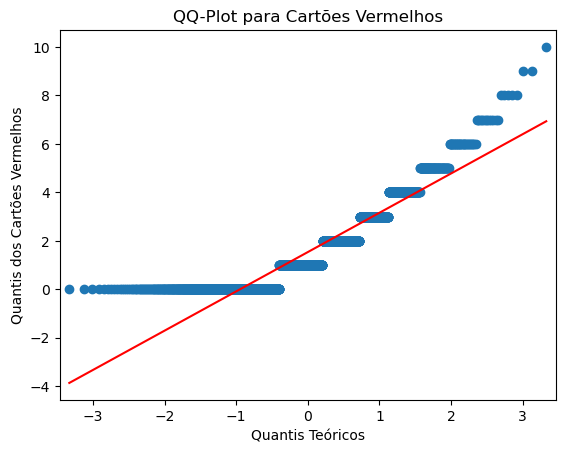

In [145]:
# Selecionar a coluna de Cartões Vermelhos do DataFrame
x = df3_soccer['Cartões Vermelhos']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Cartões Vermelhos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Cartões Vermelhos')

# Exibir o gráfico
plt.show()

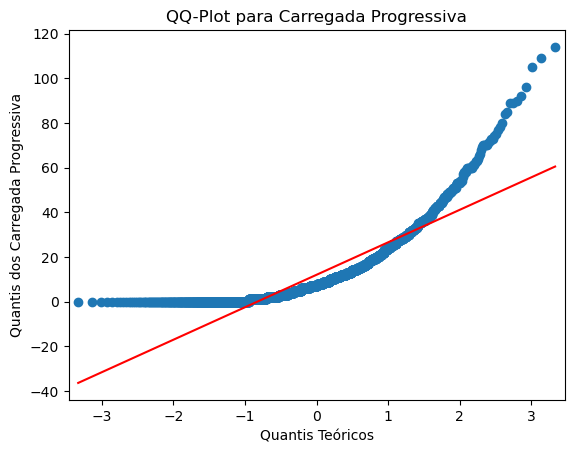

In [146]:
# Selecionar a coluna de Carregada Progressiva do DataFrame
x = df3_soccer['Carregada Progressiva']

# Criar o QQ-Plot
sm.qqplot( x , marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Carregada Progressiva')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Carregada Progressiva')

# Exibir o gráfico
plt.show()

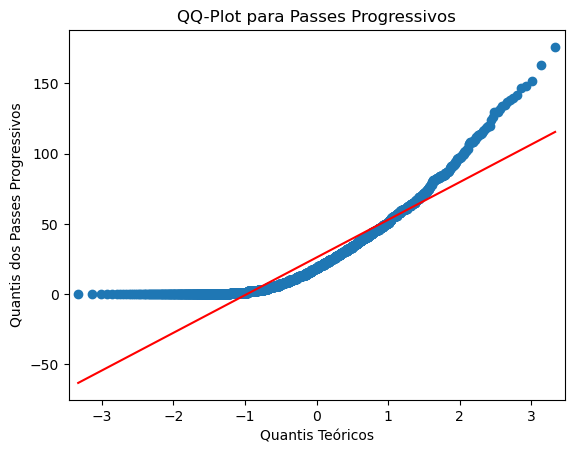

In [147]:
# Selecionar a coluna de Passes Progressivos do DataFrame
x = df3_soccer['Passes Progressivos']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Passes Progressivos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Passes Progressivos')

# Exibir o gráfico
plt.show()

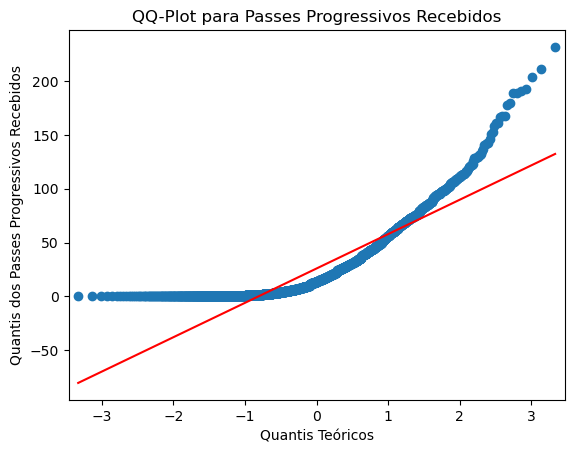

In [148]:
# Selecionar a coluna de Passes Progressivos Recebidos do DataFrame
x = df3_soccer['Passes Progressivos Recebidos']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Passes Progressivos Recebidos')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Passes Progressivos Recebidos')

# Exibir o gráfico
plt.show()

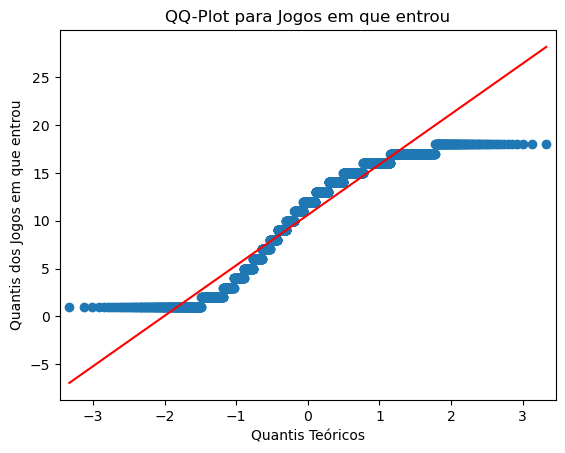

In [149]:
df3_soccer['Jogos em que entrou'] = pd.to_numeric(df3_soccer['Jogos em que entrou'], errors='coerce')
# Selecionar a coluna de Jogos em que entrou do DataFrame
x = df3_soccer['Jogos em que entrou']

# Criar o QQ-Plot
sm.qqplot(x, marker='o', line='s')

# Configurar o título e os rótulos dos eixos
plt.title('QQ-Plot para Jogos em que entrou')
plt.xlabel('Quantis Teóricos')
plt.ylabel('Quantis dos Jogos em que entrou')

# Exibir o gráfico
plt.show()

## CORRELAÇÔES 

Vou fazer Correlações para Idade e algumas colunas e depois irei fazer a correlação entre gols, assistências e Passes 
Progressivos e Passes Progressivos Recebidos.
Também irei fazer entre Minutos jogados e outras colunas.

Correlação entre idade e gols: 0.05446532160556039


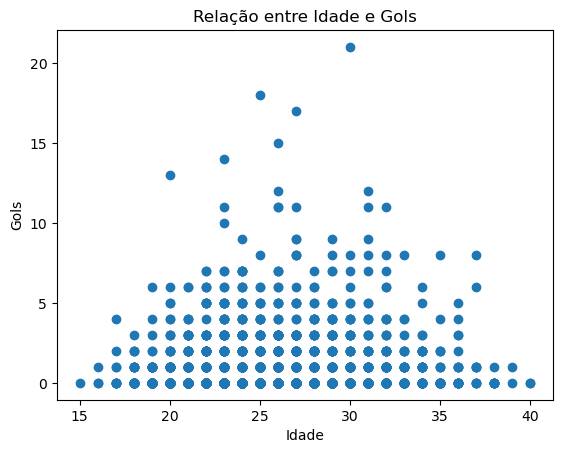

In [150]:
# Correlação entre Idade e Gols
Correlação_Idade_Goals = df3_soccer['Idade'].corr(df3_soccer['Gols'])
print("Correlação entre idade e gols:", Correlação_Idade_Goals)

idade = df3_soccer['Idade']
gols = df3_soccer['Gols']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Gols')
plt.title('Relação entre Idade e Gols')
plt.show()

Correlação entre idade e Assistências: 0.061584767034364704


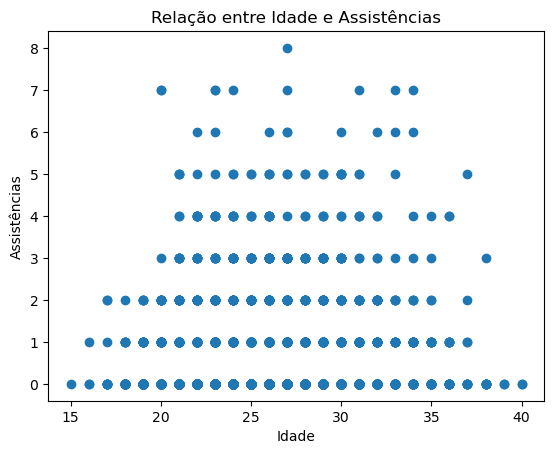

In [151]:
# Correlação entre Idade e Assistências
Correlação_Idade_Assistências = df3_soccer['Idade'].corr(df3_soccer['Assistências'])
print("Correlação entre idade e Assistências:", Correlação_Idade_Assistências)
idade = df3_soccer['Idade']
gols = df3_soccer['Assistências']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Assistências')
plt.title('Relação entre Idade e Assistências')
plt.show()

Correlação entre idade e Minutos jogados: 0.14952137586424166


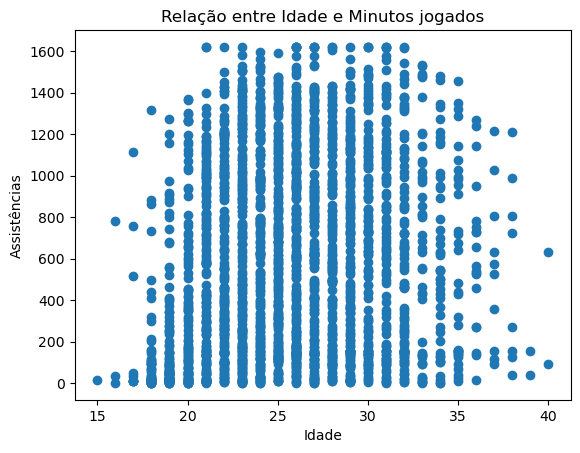

In [152]:
# Correlação entre Idade e Minutos Jogados
Correlação_Idade_Minutos_Jogados = df3_soccer['Idade'].corr(df3_soccer['Minutos jogados'])
print("Correlação entre idade e Minutos jogados:", Correlação_Idade_Minutos_Jogados)
idade = df3_soccer['Idade']
gols = df3_soccer['Minutos jogados']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Assistências')
plt.title('Relação entre Idade e Minutos jogados')
plt.show()

Correlação entre idade e Carregada Progressiva: -0.035081715307326206


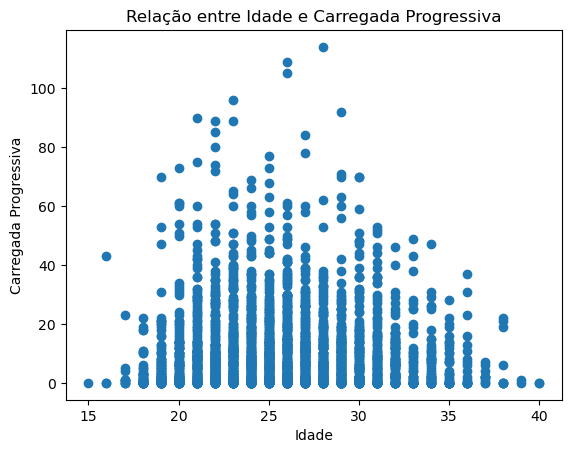

In [153]:
# Correlação entre Idade e Carregada Progressiva
Correlação_Idade_Carregada_Progressiva = df3_soccer['Idade'].corr(df3_soccer['Carregada Progressiva'])
print("Correlação entre idade e Carregada Progressiva:", Correlação_Idade_Carregada_Progressiva)
idade = df3_soccer['Idade']
gols = df3_soccer['Carregada Progressiva']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Carregada Progressiva')
plt.title('Relação entre Idade e Carregada Progressiva')
plt.show()

Correlação entre idade e Passes Progressivos: 0.1427300466536496


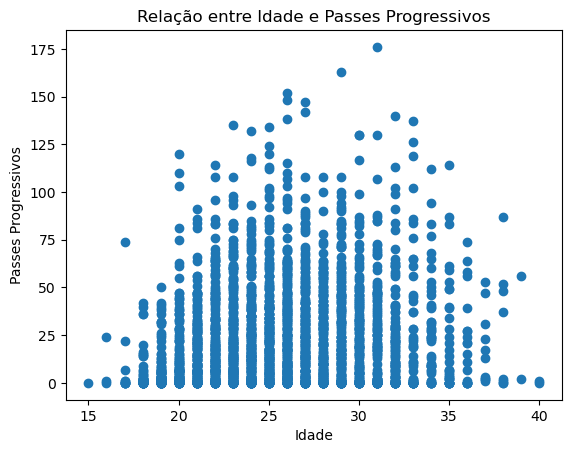

In [154]:
# Correlação entre Idade e Passes Progressivos
Correlação_Idade_Passes_Progressivos = df3_soccer['Idade'].corr(df3_soccer['Passes Progressivos'])
print("Correlação entre idade e Passes Progressivos:", Correlação_Idade_Passes_Progressivos)
idade = df3_soccer['Idade']
gols = df3_soccer['Passes Progressivos']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Passes Progressivos')
plt.title('Relação entre Idade e Passes Progressivos')
plt.show()

Correlação entre idade e Passes Progressivos Recebidos: 0.0027154785077833595


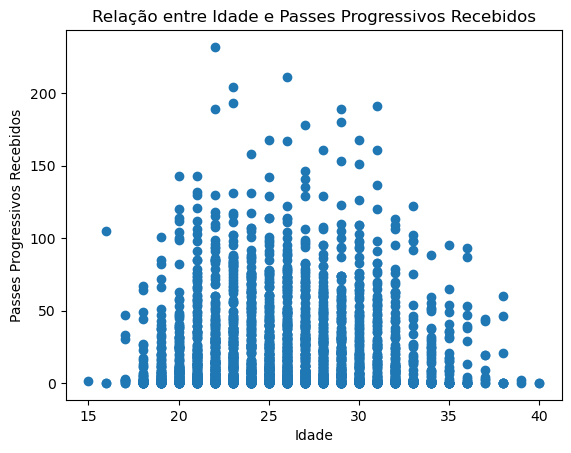

In [155]:
# Correlação entre Idade e Passes Progressivos Recebidos
Correlação_Idade_Passes_Progressivos_Recebidos= df3_soccer['Idade'].corr(df3_soccer['Passes Progressivos Recebidos'])
print("Correlação entre idade e Passes Progressivos Recebidos:", Correlação_Idade_Passes_Progressivos_Recebidos)
idade = df3_soccer['Idade']
gols = df3_soccer['Passes Progressivos Recebidos']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Passes Progressivos Recebidos')
plt.title('Relação entre Idade e Passes Progressivos Recebidos')
plt.show()

Correlação entre idade e Cartões Amarelos: 0.13163067544079304


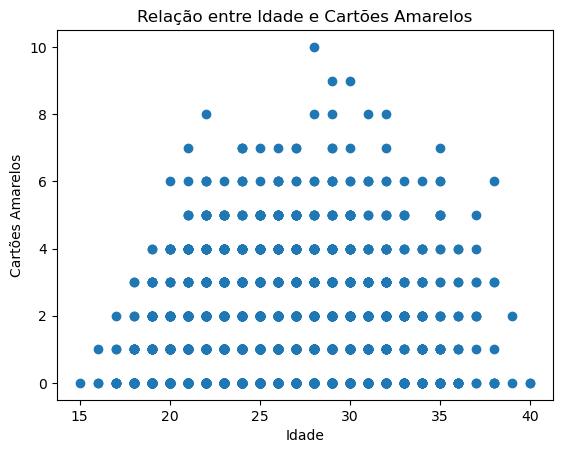

In [156]:
# Correlação entre Idade e Cartões Amarelos
Correlação_Idade_Cartões_Amarelos= df3_soccer['Idade'].corr(df3_soccer['Cartões Amarelos'])
print("Correlação entre idade e Cartões Amarelos:", Correlação_Idade_Cartões_Amarelos)
idade = df3_soccer['Idade']
gols = df3_soccer['Cartões Amarelos']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Cartões Amarelos')
plt.title('Relação entre Idade e Cartões Amarelos')
plt.show()

Correlação entre idade e Cartões Vermelhos: 0.13163067544079304


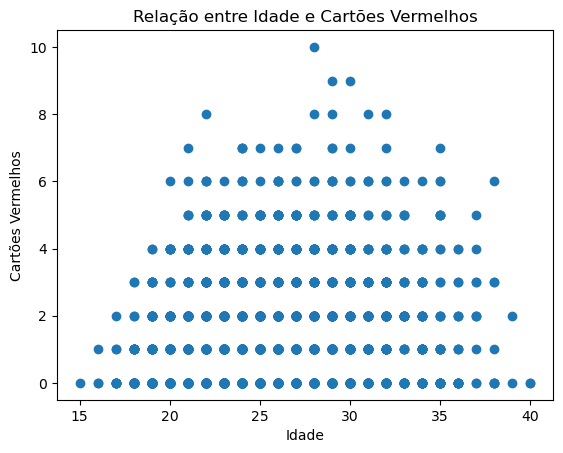

In [157]:
# Correlação entre Idade e Cartões Vermelhos
Correlação_Idade_Cartões_Vermelhos= df3_soccer['Idade'].corr(df3_soccer['Cartões Vermelhos'])
print("Correlação entre idade e Cartões Vermelhos:", Correlação_Idade_Cartões_Vermelhos)
idade = df3_soccer['Idade']
gols = df3_soccer['Cartões Vermelhos']

# Criar o gráfico de dispersão
plt.scatter(idade, gols)
plt.xlabel('Idade')
plt.ylabel('Cartões Vermelhos')
plt.title('Relação entre Idade e Cartões Vermelhos')
plt.show()

Correlação entre Gols e Passes Progressivos: 0.23715341685060484


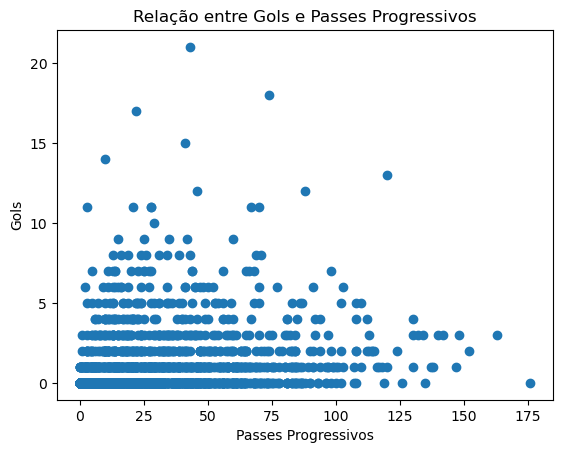

In [158]:
# Correlação entre Gols e Passes Progressivos
Correlação_Gols_Passes_Progressivos= df3_soccer['Gols'].corr(df3_soccer['Passes Progressivos'])
print("Correlação entre Gols e Passes Progressivos:", Correlação_Gols_Passes_Progressivos)
Passes_Progressivos = df3_soccer['Passes Progressivos']
gols = df3_soccer['Gols']

# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos, gols)
plt.xlabel('Passes Progressivos')
plt.ylabel('Gols')
plt.title('Relação entre Gols e Passes Progressivos')
plt.show()

Correlação entre Gols e Passes Progressivos: 0.0027154785077833595


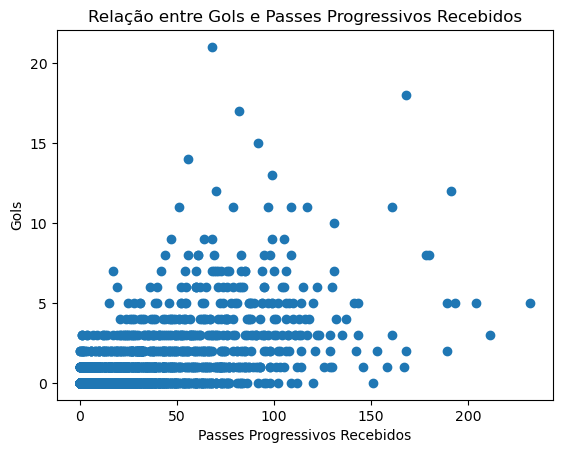

In [159]:
# Correlação entre Gols e Passes Progressivos Recebidos
Correlação_Gols_Passes_Progressivos_Recebidos= df3_soccer['Gols'].corr(df3_soccer['Passes Progressivos Recebidos'])
print("Correlação entre Gols e Passes Progressivos:", Correlação_Idade_Passes_Progressivos_Recebidos)
Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos']
gols = df3_soccer['Gols']

# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos_Recebidos, gols)
plt.xlabel('Passes Progressivos Recebidos')
plt.ylabel('Gols')
plt.title('Relação entre Gols e Passes Progressivos Recebidos')
plt.show()

Correlação entre Assistências e Passes Progressivos: 0.4332254452196703


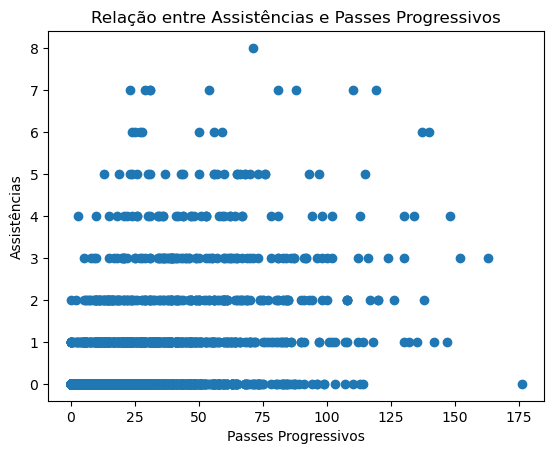

In [160]:
# Correlação entre Assistências e Passes Progressivos
Correlação_Assistências_Passes_Progressivos= df3_soccer['Assistências'].corr(df3_soccer['Passes Progressivos'])
print("Correlação entre Assistências e Passes Progressivos:", Correlação_Assistências_Passes_Progressivos)
Passes_Progressivos = df3_soccer['Passes Progressivos']
Assistências = df3_soccer['Assistências']
# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos, Assistências)
plt.xlabel('Passes Progressivos')
plt.ylabel('Assistências')
plt.title('Relação entre Assistências e Passes Progressivos')
plt.show()

Correlação entre Assistências e Passes Progressivos Recebidos: 0.6336366495663136


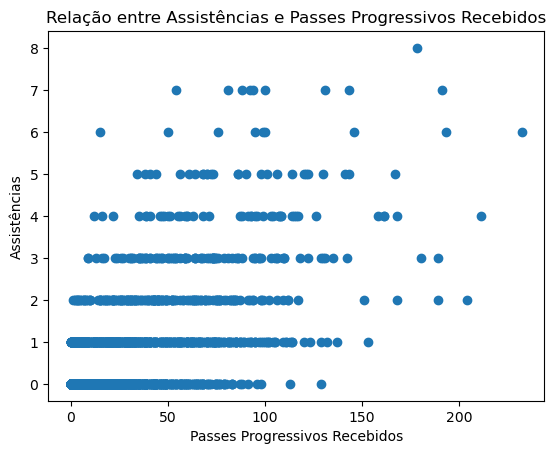

In [161]:
# Correlação entre Assistências e Passes Progressivos Recebidos
Correlação_Assistências_Passes_Progressivo_Recebidos= df3_soccer['Assistências'].corr(df3_soccer['Passes Progressivos Recebidos'])
print("Correlação entre Assistências e Passes Progressivos Recebidos:",Correlação_Assistências_Passes_Progressivo_Recebidos)
Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos']
Assistências = df3_soccer['Assistências']

# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos_Recebidos, Assistências)
plt.xlabel('Passes Progressivos Recebidos')
plt.ylabel('Assistências')
plt.title('Relação entre Assistências e Passes Progressivos Recebidos')
plt.show()

Correlação entre Passes Progressivos e Passes Progressivos Recebidos: 0.6336366495663136


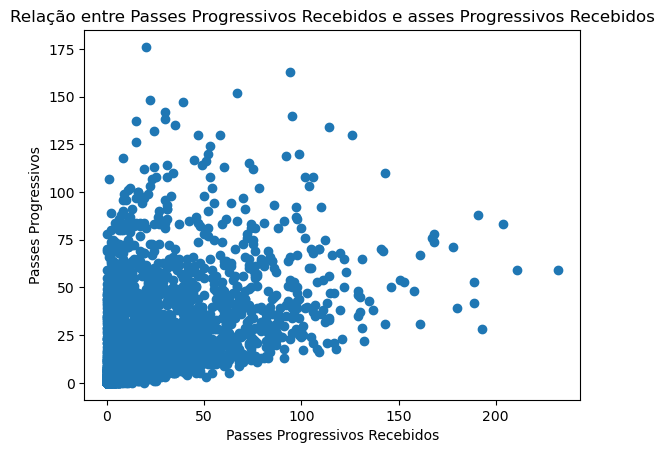

In [162]:
# Correlação entre Passes Progressivos e Passes Progressivos Recebidos
Correlação_Passes_Progressivo_Passes_Progressivo_Recebidos= df3_soccer['Passes Progressivos'].corr(df3_soccer['Passes Progressivos Recebidos'])
print("Correlação entre Passes Progressivos e Passes Progressivos Recebidos:",Correlação_Assistências_Passes_Progressivo_Recebidos)
Passes_Progressivos_Recebidos = df3_soccer['Passes Progressivos Recebidos']
Passes_Progressivos = df3_soccer['Passes Progressivos']

# Criar o gráfico de dispersão
plt.scatter(Passes_Progressivos_Recebidos, Passes_Progressivos)
plt.xlabel('Passes Progressivos Recebidos')
plt.ylabel('Passes Progressivos')
plt.title('Relação entre Passes Progressivos Recebidos e asses Progressivos Recebidos')
plt.show()

## TESTE DE NORMALIDADE

Fazendo Teste de Normalidade para as colunas Idade,  Minutos jogados, Gols , Assistências ,Cartões Amarelos, Cartões Vermelhos
, Carregada Progressiva , Passes Progressivos e Passes Progressivos Recebidos.

# Importando as bibliotecas necessárias

In [163]:
import scipy
import scipy.stats
from sklearn.preprocessing import StandardScaler

In [164]:
df3_soccer['Idade'] = pd.to_numeric(df3_soccer['Idade'], errors='coerce')
df3_soccer['Idade']

1       23.0
2       23.0
3       20.0
4       36.0
5       23.0
        ... 
2301    26.0
2302    24.0
2303    25.0
2304    33.0
2305    20.0
Name: Idade, Length: 2305, dtype: float64

In [165]:
# Teste de Normalidade para a coluna Idade
print('Para a coluna Idade: \n')
y_std = scipy.stats.zscore(df3_soccer['Idade'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Idade: 

array:
[nan nan nan ... nan nan nan]


Distância:
nan
p_value:
nan


Os dados não seguem uma Distruição Normal


In [166]:
# Teste de Normalidade para a coluna Minutos jogados
print('Para a coluna Minutos jogados: \n')
y_std = scipy.stats.zscore(df3_soccer['Minutos jogados'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Minutos jogados: 

array:
[ 0.72785849 -0.60747088 -1.09187607 ...  1.53162817  0.61211565
  0.15557447]
Distância:
0.10809799759874167
p_value:
3.272370358125746e-24
Os dados não seguem uma Distruição Normal


In [167]:
# Teste de Normalidade para a coluna Gols
print('Para a coluna Gols: \n')
y_std = scipy.stats.zscore(df3_soccer['Gols'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Gols: 

array:
[-0.51686871 -0.51686871 -0.51686871 ...  1.68125376  1.68125376
 -0.51686871]


Distância:
0.30128064978237423
p_value:
2.2026970381904565e-186


Os dados não seguem uma Distruição Normal


In [168]:
# Teste de Normalidade para a coluna Assistências
print('Para a coluna Assistências: \n')
y_std = scipy.stats.zscore(df3_soccer['Assistências'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Assistências: 

array:
[ 0.28215762 -0.56911635  0.28215762 ...  1.98470557  0.28215762
 -0.56911635]


Distância:
0.3522377654840956
p_value:
1.481893927050074e-256


Os dados não seguem uma Distruição Normal


In [169]:
# Teste de Normalidade para a coluna Cartões Amarelos
print('Para a coluna Cartões Amarelos: \n')
y_std = scipy.stats.zscore(df3_soccer['Cartões Amarelos'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Cartões Amarelos: 

array:
[-0.33003106  0.28693698 -0.94699909 ... -0.33003106  0.28693698
 -0.33003106]


Distância:
0.2106566542016755
p_value:
1.5990774734362961e-90


Os dados não seguem uma Distruição Normal


In [170]:
# Teste de Normalidade para a coluna Cartões Vermelhos
print('Para a coluna Cartões Vermelhos: \n')
y_std = scipy.stats.zscore(df3_soccer['Cartões Vermelhos'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Cartões Vermelhos: 

array:
[-0.33003106  0.28693698 -0.94699909 ... -0.33003106  0.28693698
 -0.33003106]


Distância:
0.2106566542016755
p_value:
1.5990774734362961e-90


Os dados não seguem uma Distruição Normal


In [171]:
# Teste de Normalidade para a coluna Carregada Progressiva
print('Para a coluna Carregada Progressiva: \n')
y_std = scipy.stats.zscore(df3_soccer['Carregada Progressiva'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Carregada Progressiva: 

array:
[ 0.2711259  -0.55433831 -0.69191567 ...  1.37174483 -0.69191567
  0.13354853]


Distância:
0.1619109572214571
p_value:
1.453636749407097e-53


Os dados não seguem uma Distruição Normal


In [172]:
# Teste de Normalidade para a coluna Passes Progressivos
print('Para a coluna Passes Progressivos: \n')
y_std = scipy.stats.zscore(df3_soccer['Passes Progressivos'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Passes Progressivos: 

array:
[ 0.1795671  -0.64070565 -0.78984615 ...  3.19966224 -0.5661354
  0.10499685]


Distância:
0.12066109953632892
p_value:
5.29605137190115e-30


Os dados não seguem uma Distruição Normal


In [173]:
# Teste de Normalidade para a coluna Passes Progressivos Recebidos
print('Para a coluna Passes Progressivos Recebidos: \n')
y_std = scipy.stats.zscore(df3_soccer['Passes Progressivos Recebidos'].values)
y_std = y_std.flatten()
# print do array dessa coluna
print('array:')
print(y_std)
print('\n')
# Calculando a Distancia e o p_value dessa coluna
Distancia,p_value = scipy.stats.kstest(y_std,'norm', alternative ='greater')
print('Distância:')
print(Distancia)
print('p_value:')
print(p_value)
print('\n')
# Checando se os dados são uma distruição normal  ou não
if Distancia<p_value:
    print('Os dados seguem uma Distruição Normal')
else:
    print('Os dados não seguem uma Distruição Normal')

Para a coluna Passes Progressivos Recebidos: 

array:
[-0.21555419 -0.24681654 -0.59070231 ...  1.535137    0.00328221
 -0.46565294]


Distância:
0.16353711061648862
p_value:
1.2296199609297983e-54


Os dados não seguem uma Distruição Normal


## Cramer's V correlation matrix 

C:\Users\user\AppData\Local\Temp\ipykernel_9444\3606016118.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df3_soccer.corr()


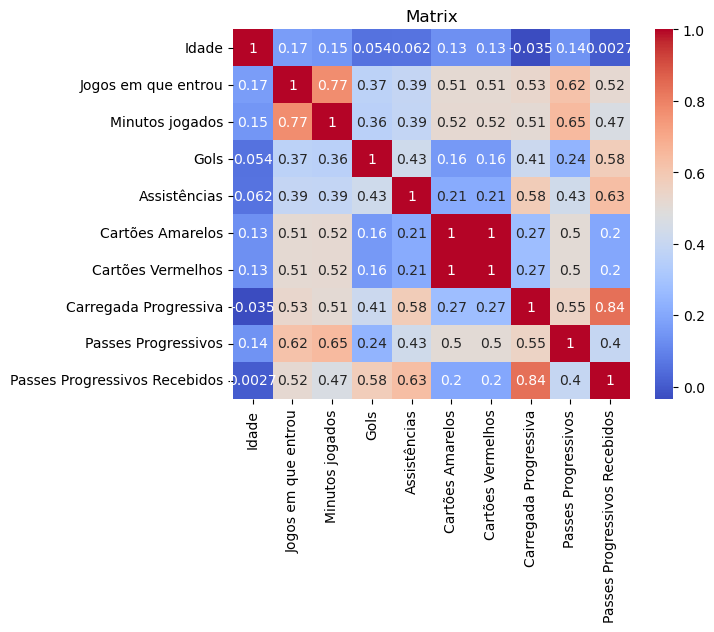

In [174]:
correlation_matrix = df3_soccer.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix')
plt.show()

## Best Fit Distribution 

Calcularei a Best Fit Distribution para as colunas Idade ,Jogos em que entrou , Minutos jogados, Gols, Assistências , Cartões Amarelos , Cartões Vermelhos, Carrega Progressiva, Passes Progressivos e Passes Progressivos Recebidos


In [175]:
# Colocando todos os tipos de Distribuição
dist_names = ['beta',
              'expon',
              'gamma',
              'lognorm',
              'norm',
              'pearson3',
              't',
              'triang',
              'uniform',
              'weibull_min', 
              'weibull_max']

In [176]:
# Criando uma função que vai checar que tipo de distribuição é para os dados repassados
def check_distribution(dist_names, y_std):
    
    p_values = []
    distance = []
    D_less_p = []
    
    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)

        if distribution != "norm":
            D, p = scipy.stats.kstest(y_std, distribution, args=param)
        else:
            D, p = scipy.stats.kstest(y_std, distribution,  alternative='greater')
            
        #p = np.around(p, 5)
        p_values.append(p)    
        
        #D = np.around(D, 5)
        distance.append(D)    
        
        if D<p: 
            D_less_p.append("yes") 
        else: 
            D_less_p.append("no")

    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['Distance'] = distance
    results['p_value'] = p_values
    results['D<p'] = D_less_p
    
    results.sort_values(['p_value'], ascending=False, inplace=True)


    print ('\nDistributions sorted by goodness of fit:')
    print ('----------------------------------------')
    print (results)

In [177]:
# Calculando o Best Fit Distribution para a Coluna Idade
y_std = scipy.stats.zscore(df3_soccer['Idade'].values)
y_std = y_std.flatten()
y_std

array([nan, nan, nan, ..., nan, nan, nan])

In [ ]:
# Calculando qual a distribuição para a coluna Idade
check_distribution(dist_names, y_std)

In [ ]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [178]:
# Calculando o Best Fit Distribution para a Coluna Minutos jogados
y_std = scipy.stats.zscore(df3_soccer['Minutos jogados'].values)
y_std = y_std.flatten()
y_std

array([ 0.72785849, -0.60747088, -1.09187607, ...,  1.53162817,
        0.61211565,  0.15557447])

In [179]:
# Calculando qual a distribuição para a coluna jogados
check_distribution(dist_names, y_std)


Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance       p_value D<p
0          beta  0.063778  1.355553e-08  no
9   weibull_min  0.101867  2.816117e-21  no
3       lognorm  0.102082  2.298793e-21  no
10  weibull_max  0.104479  2.316654e-22  no
1         expon  0.105246  1.098613e-22  no
7        triang  0.105463  8.890198e-23  no
6             t  0.108102  6.515834e-24  no
4          norm  0.108098  3.272370e-24  no
5      pearson3  0.109895  1.063976e-24  no
2         gamma  0.116041  1.695934e-27  no
8       uniform  0.175449  1.576923e-62  no


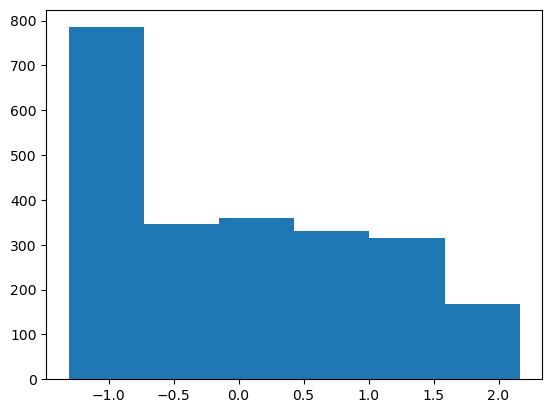

In [180]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [181]:
# Calculando o Best Fit Distribution para a Coluna Gols
y_std = scipy.stats.zscore(df3_soccer['Gols'].values)
y_std = y_std.flatten()
y_std

array([-0.51686871, -0.51686871, -0.51686871, ...,  1.68125376,
        1.68125376, -0.51686871])

In [182]:
# # Calculando qual a distribuição para a coluna Gols
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
4          norm  0.301281  2.202697e-186  no
0          beta  0.600717   0.000000e+00  no
1         expon  0.603905   0.000000e+00  no
2         gamma  0.603898   0.000000e+00  no
3       lognorm  0.601150   0.000000e+00  no
5      pearson3  0.588944   0.000000e+00  no
6             t  0.500000   0.000000e+00  no
7        triang  0.569519   0.000000e+00  no
8       uniform  0.784692   0.000000e+00  no
9   weibull_min  0.603905   0.000000e+00  no
10  weibull_max  0.828868   0.000000e+00  no


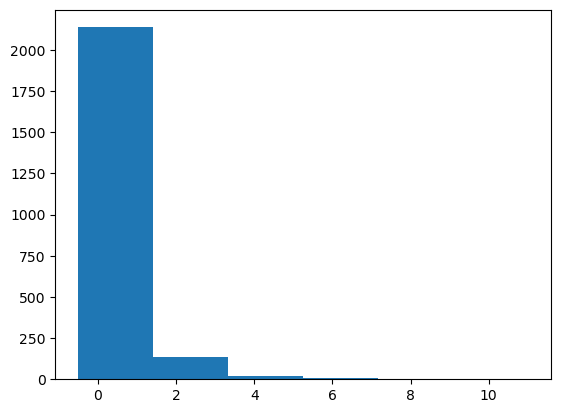

In [183]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [184]:
# Calculando o Best Fit Distribution para a Coluna Assistências
y_std = scipy.stats.zscore(df3_soccer['Assistências'].values)
y_std = y_std.flatten()
y_std

array([ 0.28215762, -0.56911635,  0.28215762, ...,  1.98470557,
        0.28215762, -0.56911635])

In [185]:
# Calculando qual a distribuição para a coluna Assistências
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
4          norm  0.352238  1.481894e-256  no
0          beta  0.436431   0.000000e+00  no
1         expon  0.636876   0.000000e+00  no
2         gamma  0.428881   0.000000e+00  no
3       lognorm  0.636671   0.000000e+00  no
5      pearson3  0.634345   0.000000e+00  no
6             t  0.500000   0.000000e+00  no
7        triang  0.636876   0.000000e+00  no
8       uniform  0.720119   0.000000e+00  no
9   weibull_min  0.492404   0.000000e+00  no
10  weibull_max  0.406702   0.000000e+00  no


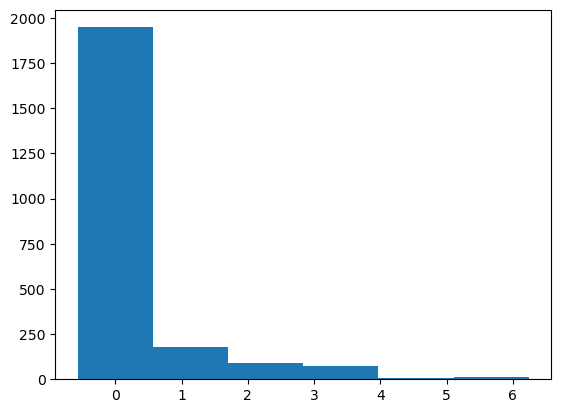

In [186]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [187]:
# Calculando o Best Fit Distribution para a Coluna Cartões Amarelos
y_std = scipy.stats.zscore(df3_soccer['Cartões Amarelos'].values)
y_std = y_std.flatten()
y_std

array([-0.33003106,  0.28693698, -0.94699909, ..., -0.33003106,
        0.28693698, -0.33003106])

In [188]:
# Calculando qual a distribuição para a coluna Cartões Amarelos
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
6             t  0.180512   3.437064e-66  no
4          norm  0.210657   1.599077e-90  no
5      pearson3  0.344902  2.118141e-245  no
0          beta  0.344902  2.113666e-245  no
9   weibull_min  0.344902  2.113661e-245  no
1         expon  0.344902  2.113661e-245  no
7        triang  0.382452  1.052243e-303  no
2         gamma  0.570867   0.000000e+00  no
3       lognorm  0.470816   0.000000e+00  no
8       uniform  0.570282   0.000000e+00  no
10  weibull_max  0.754351   0.000000e+00  no


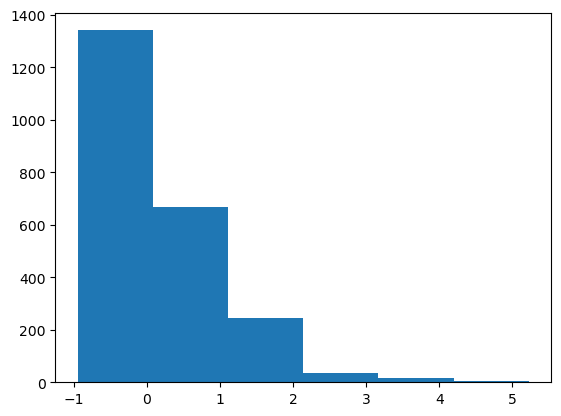

In [189]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [190]:
# Calculando o Best Fit Distribution para a Coluna Cartões Vermelhos
y_std = scipy.stats.zscore(df3_soccer['Cartões Vermelhos'].values)
y_std = y_std.flatten()
y_std

array([-0.33003106,  0.28693698, -0.94699909, ..., -0.33003106,
        0.28693698, -0.33003106])

In [191]:
# Calculando qual a distribuição para a coluna Cartões Vermelhos
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
6             t  0.180512   3.437064e-66  no
4          norm  0.210657   1.599077e-90  no
5      pearson3  0.344902  2.118141e-245  no
0          beta  0.344902  2.113666e-245  no
9   weibull_min  0.344902  2.113661e-245  no
1         expon  0.344902  2.113661e-245  no
7        triang  0.382452  1.052243e-303  no
2         gamma  0.570867   0.000000e+00  no
3       lognorm  0.470816   0.000000e+00  no
8       uniform  0.570282   0.000000e+00  no
10  weibull_max  0.754351   0.000000e+00  no


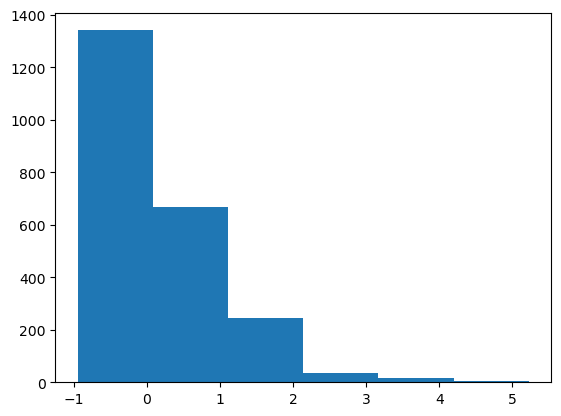

In [192]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [193]:
df3_soccer = df3_soccer.dropna(subset=['Carregada Progressiva'])
df3_soccer = df3_soccer.dropna(subset=['Passes Progressivos'])
df3_soccer = df3_soccer.dropna(subset=['Passes Progressivos Recebidos'])

In [194]:
# Calculando o Best Fit Distribution para a Coluna Carregada Progressiva
y_std = scipy.stats.zscore(df3_soccer['Carregada Progressiva'].values)
y_std = y_std.flatten()
y_std

array([ 0.2711259 , -0.55433831, -0.69191567, ...,  1.37174483,
       -0.69191567,  0.13354853])

In [195]:
# Calculando qual a distribuição para a coluna Carregada Progressiva
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
10  weibull_max  0.120196   1.781552e-29  no
4          norm  0.161911   1.453637e-53  no
5      pearson3  0.171800   5.892370e-60  no
2         gamma  0.171800   5.890010e-60  no
1         expon  0.171800   5.890010e-60  no
0          beta  0.194675   5.280800e-77  no
6             t  0.210216   7.654721e-90  no
9   weibull_min  0.268368  4.376783e-147  no
3       lognorm  0.312082  5.989565e-200  no
7        triang  0.495101   0.000000e+00  no
8       uniform  0.641154   0.000000e+00  no


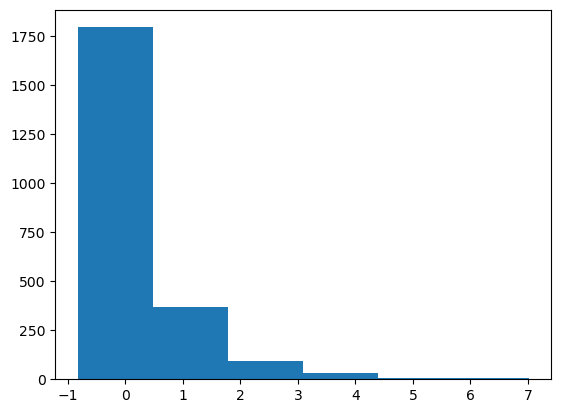

In [196]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [197]:
# Calculando o Best Fit Distribution para a Coluna Passes Progressivos
y_std = scipy.stats.zscore(df3_soccer['Passes Progressivos'].values)
y_std = y_std.flatten()
y_std

array([ 0.1795671 , -0.64070565, -0.78984615, ...,  3.19966224,
       -0.5661354 ,  0.10499685])

In [198]:
# Calculando qual a distribuição para a coluna Passes Progressivos
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance       p_value D<p
10  weibull_max  0.103616  5.326182e-22  no
9   weibull_min  0.113232  3.365513e-26  no
5      pearson3  0.113232  3.365510e-26  no
3       lognorm  0.117351  4.103643e-28  no
4          norm  0.120661  5.296051e-30  no
1         expon  0.131668  2.642359e-35  no
0          beta  0.154313  2.138203e-48  no
2         gamma  0.169957  1.118774e-58  no
6             t  0.173804  2.312786e-61  no
7        triang  0.459187  0.000000e+00  no
8       uniform  0.553653  0.000000e+00  no


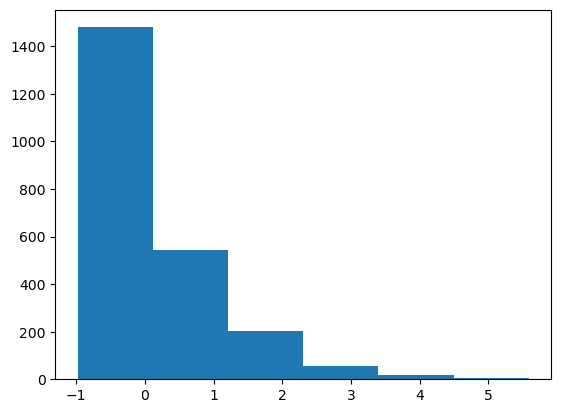

In [199]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

In [200]:
# Calculando o Best Fit Distribution para a Coluna Passes Progressivos Recebidos
y_std = scipy.stats.zscore(df3_soccer['Passes Progressivos Recebidos'].values)
y_std = y_std.flatten()
y_std

array([-0.21555419, -0.24681654, -0.59070231, ...,  1.535137  ,
        0.00328221, -0.46565294])

In [201]:
# Calculando qual a distribuição para a coluna Passes Progressivos Recebidos
check_distribution(dist_names, y_std)

C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\stats\_continuous_distns.py:709: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\user\AppData\Local\anaconda3\Lib\site-packages\scipy\optimize\_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)



Distributions sorted by goodness of fit:
----------------------------------------
   Distribution  Distance        p_value D<p
10  weibull_max  0.150929   2.636843e-46  no
9   weibull_min  0.160521   2.354649e-52  no
2         gamma  0.160521   2.354643e-52  no
5      pearson3  0.160521   2.354638e-52  no
4          norm  0.163537   1.229620e-54  no
1         expon  0.193785   2.674374e-76  no
6             t  0.247600  5.893989e-125  no
0          beta  0.251488  5.918232e-129  no
3       lognorm  0.323377  5.037634e-215  no
7        triang  0.332074  4.914933e-227  no
8       uniform  0.603110   0.000000e+00  no


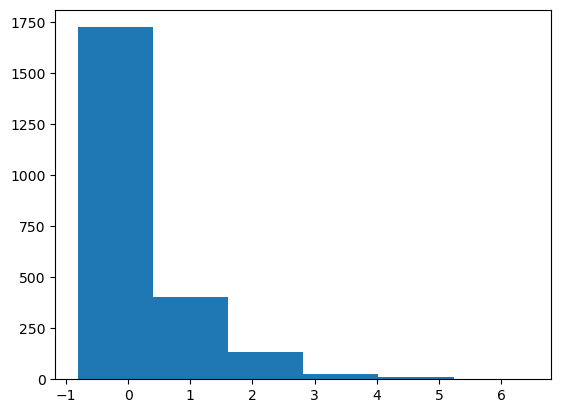

In [202]:
# gráfico
plt.hist(y_std,bins=6)
plt.show()

# MARCHING LEARNING

## Importando as Bibliotecas necessárias para fazer o Modelo de Classificação

In [203]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
import warnings
from sklearn.preprocessing import MultiLabelBinarizer

## Distribuição dos Dados por Posição

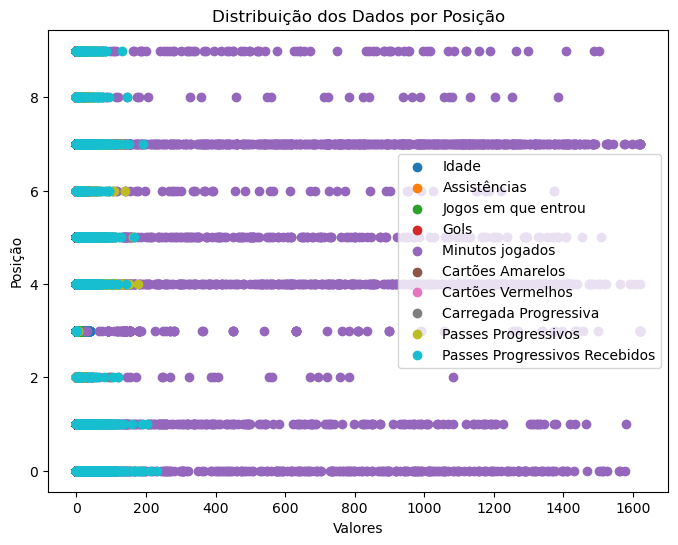

In [204]:
# Selecionar as colunas para visualização
columns = ['Idade', 'Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
           'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
           'Passes Progressivos', 'Passes Progressivos Recebidos']

position_col = 'Posição'  # Coluna "Posição"

# Inicializar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar a coluna "Posição"
df3_soccer_encoded = df3_soccer.copy()
df3_soccer_encoded['Posição'] = label_encoder.fit_transform(df3_soccer['Posição'])

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar os dados de cada coluna em relação à coluna "Posição"
for col in columns:
    ax.scatter(df3_soccer_encoded[col], df3_soccer_encoded[position_col], label=col)

# Definir rótulos e título do gráfico
ax.set_xlabel('Valores')
ax.set_ylabel('Posição')
ax.set_title('Distribuição dos Dados por Posição')

# Adicionar legenda
ax.legend()

# Exibir o gráfico
plt.show()

# Fazendo um Modelo de Classificação usando RandomForestClassifier

In [205]:
# Selecionar as colunas que serão usadas no features (X) e no target (y)
X = df3_soccer[['Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
                'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
                'Passes Progressivos', 'Passes Progressivos Recebidos']]
y = df3_soccer['Posição']

# Inicializar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar a coluna "Posição" para transforma-la de String para Int
y_encoded = label_encoder.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Inicializar o scaler
scaler = StandardScaler()

# Normalizar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Normalizar os dados de teste
X_test_scaled = scaler.transform(X_test)

# Depois de alguns testes concluí que esses são os melhores parâmentros para usar
best_params = {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 400}

# Inicializar o modelo RandomForestClassifier
random_forest_model = RandomForestClassifier(**best_params)

# Treinamento do modelo 
random_forest_model.fit(X_train_scaled, y_train)

# Fazer previsões com o modelo treinado
random_forest_predictions = random_forest_model.predict(X_test_scaled)

# Calcular a acuracia das previsões
accuracy = accuracy_score(y_test, random_forest_predictions)

# printar a acuracia de acertos
print("Acurácia:", accuracy)

Acurácia: 0.5466377440347071


## Quantidade de acertos e erros por Posição no modelo do teste¶

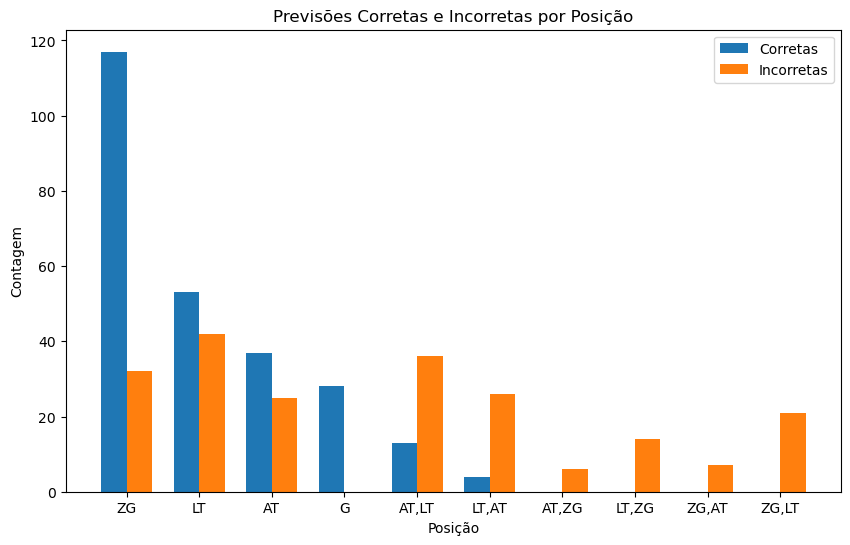

In [206]:
# Decodificar as previsões para obter as classes originais
y_test_decoded = label_encoder.inverse_transform(y_test)
random_forest_predictions_decoded = label_encoder.inverse_transform(random_forest_predictions)

# Pegar cada posição possivel
positions = np.unique(df3_soccer['Posição'])

# contar as previsões corretas e incorretas para cada posição
correct_counts = pd.Series(0, index=positions)
incorrect_counts = pd.Series(0, index=positions)

# Contar as previsões corretas e incorretas para cada posição
for i in range(len(random_forest_predictions)):
    if random_forest_predictions[i] == y_test[i]:
        correct_counts[y_test_decoded[i]] += 1
    else:
        incorrect_counts[y_test_decoded[i]] += 1

# Ordenar as posições com base na contagem de previsões corretas
sorted_positions = correct_counts.sort_values(ascending=False).index

# Ajustar o gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(positions))

# Plotar as barras para previsões corretas e incorretas, usando a ordem correta das posições
plt.bar(index, correct_counts[sorted_positions], bar_width, label='Corretas')
plt.bar(index + bar_width, incorrect_counts[sorted_positions], bar_width, label='Incorretas')

# Configurar o eixo x
plt.xticks(index + bar_width / 2, sorted_positions)
plt.xlabel('Posição')
plt.ylabel('Contagem')

# Configurar título e legenda
plt.title('Previsões Corretas e Incorretas por Posição')
plt.legend()

# Exibir o gráfico
plt.show()

## Curva Precision-Recall para o resultado

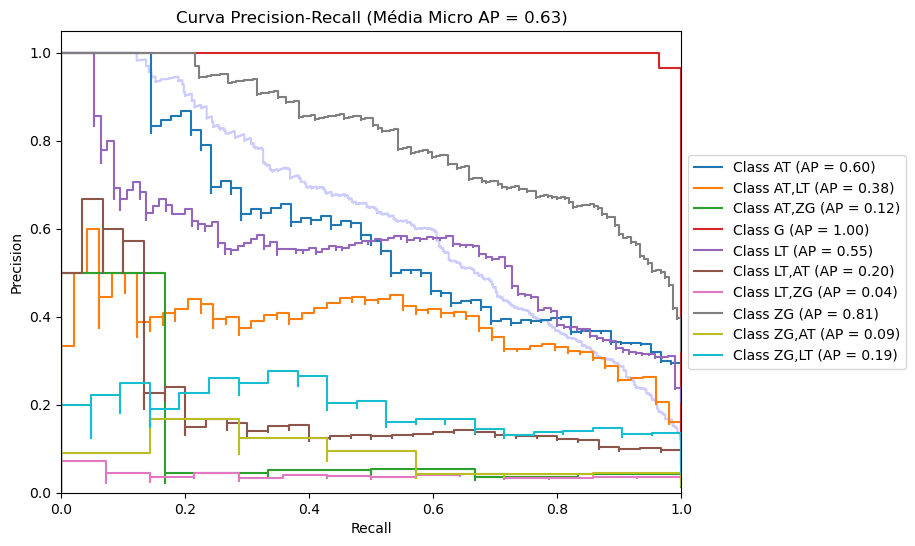

In [207]:
# Pegar cada posição possivel
unique_positions = np.unique(df3_soccer['Posição'])

# Binarizar as classes
y_test_bin = label_binarize(y_test_decoded, classes=unique_positions)
n_classes = y_test_bin.shape[1]

# Calcular as probabilidades de previsão para cada classe
y_scores = random_forest_model.predict_proba(X_test_scaled)

# Calcular a curva Precision-Recall para cada posição
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_scores[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_scores[:, i])

# Calcular a média da precisão média ponderada (average precision score) para a média micro
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_scores.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, y_scores, average="micro")

# Plotar a curva Precision-Recall para cada classe
plt.figure(figsize=(8, 6))
plt.step(recall["micro"], precision["micro"], color='b', alpha=0.2, where='post')
for i in range(n_classes):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AP = {1:0.2f})'.format(unique_positions[i], average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (Média Micro AP = {0:0.2f})'.format(average_precision["micro"]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

# Fazendo outro Modelo , mas agora retirando os outliers do dataset 

In [208]:
# Selecionar as colunas para calcular o Z-Score e remover outliers
columns = ['Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
           'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
           'Passes Progressivos', 'Passes Progressivos Recebidos']

# Calcular o Z-Score das colunas selecionadas
z_scores = stats.zscore(df3_soccer[columns])

# Definir um limite para identificar outliers com base no desvio padrão
threshold = 3

# Identificar os outliers pelo indice
outlier_indices = (np.abs(z_scores) > threshold).any(axis=1)

# Remover outliers do DataSet
df3_soccer = df3_soccer[~outlier_indices]

df3_soccer.head(2775)

,Nome,Sobrenome,Nacionalidade,Posição,Clube,Liga,Idade,Ano em que nasceu,Jogos em que entrou,Jogos Iniciados,...,Gols/90min,Assis/90min,(Gols+Assis)/90min,Gols Normais/90min,(Gols normais+Assis)/90min,Gols previstos por 90min,Gols Assistidos esperados em 90min,Gols esperados+gols previstos em 90min,Gols normais previstos em 90min,"Gols esperados,exceto pênaltis,+gols assistidos em 90min"
1,Max,Aarons,ENG,ZG,Bournemouth,Premier League,23.0,2000,12,11,...,"0,00","0,09","0,09","0,00","0,09","0,00","0,08","0,08","0,00","0,08"
2,Brenden,Aaronson,USA,LT,Union Berlin,Bundesliga,23.0,2000,11,4,...,"0,00","0,00","0,00","0,00","0,00","0,04","0,07","0,11","0,04","0,11"
3,Paxten,Aaronson,USA,LT,Eint Frankfurt,Bundesliga,20.0,2003,7,1,...,"0,00","0,89","0,89","0,00","0,89","0,11","0,07","0,19","0,11","0,19"
4,Yunis,Abdelhamid,MAR,ZG,Reims,Ligue 1,36.0,1987,16,16,...,"0,19","0,00","0,19","0,19","0,19","0,14","0,01","0,15","0,14","0,15"
5,Salis,Abdul Samed,GHA,LT,Lens,Ligue 1,23.0,2000,17,14,...,"0,00","0,00","0,00","0,00","0,00","0,06","0,04","0,10","0,06","0,10"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2300,Kurt,Zouma,FRA,ZG,West Ham,Premier League,29.0,1994,16,16,...,"0,06","0,00","0,06","0,06","0,06","0,07","0,00","0,07","0,07","0,07"
2301,Igor,Zubeldia,ESP,ZG,Real Sociedad,La Liga,26.0,1997,17,16,...,"0,00","0,06","0,06","0,00","0,06","0,02","0,04","0,06","0,02","0,06"
2302,Martín,Zubimendi,ESP,LT,Real Sociedad,La Liga,24.0,1999,18,16,...,"0,18","0,06","0,24","0,18","0,24","0,11","0,07","0,17","0,11","0,17"
2304,Milan,Đurić,BIH,AT,Hellas Verona,Serie A,33.0,1990,16,9,...,"0,40","0,10","0,50","0,30","0,40","0,32","0,09","0,40","0,16","0,25"


## Distribuição dos novos dados por Posição

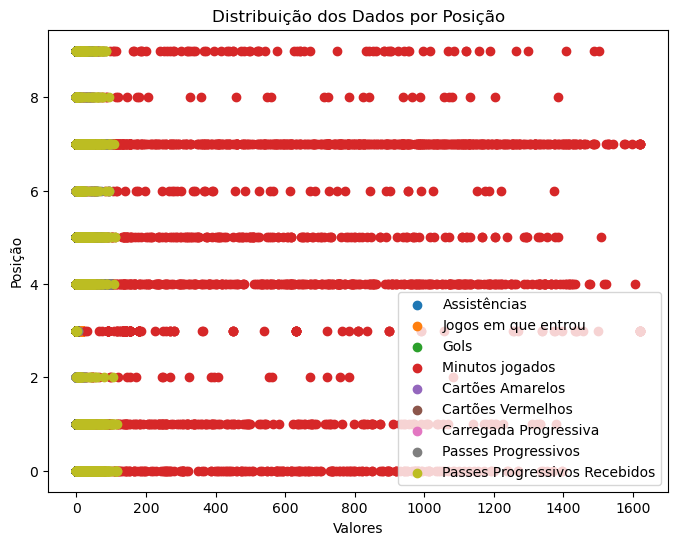

In [209]:
# Selecionar as colunas para visualização
columns = ['Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
           'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
           'Passes Progressivos', 'Passes Progressivos Recebidos']
position_col = 'Posição'  # Coluna "Posição"

# Inicializar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar a coluna "Posição"
df3_soccer_encoded = df3_soccer.copy()
df3_soccer_encoded['Posição'] = label_encoder.fit_transform(df3_soccer['Posição'])

# Configurações do gráfico
fig, ax = plt.subplots(figsize=(8, 6))

# Plotar os dados de cada coluna em relação à coluna "Posição"
for col in columns:
    ax.scatter(df3_soccer_encoded[col], df3_soccer_encoded[position_col], label=col)

# Definir rótulos e título do gráfico
ax.set_xlabel('Valores')
ax.set_ylabel('Posição')
ax.set_title('Distribuição dos Dados por Posição')

# Adicionar legenda
ax.legend()

# Exibir o gráfico
plt.show()

# Fazendo um Modelo de Classificação usando RandomForestClassifier

In [210]:
# Selecionar as colunas que serão usadas no features (X) e no target (y)
X = df3_soccer[['Assistências', 'Jogos em que entrou', 'Gols', 'Minutos jogados',
                'Cartões Amarelos', 'Cartões Vermelhos', 'Carregada Progressiva',
                'Passes Progressivos', 'Passes Progressivos Recebidos']]
y = df3_soccer['Posição']

# Inicializar o codificador de rótulos
label_encoder = LabelEncoder()

# Codificar a coluna "Posição" para transforma-la de String para Int
y_encoded = label_encoder.fit_transform(y)

# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Inicializar o scaler
scaler = StandardScaler()

# Normalizar os dados de treino
X_train_scaled = scaler.fit_transform(X_train)

# Normalizar os dados de teste
X_test_scaled = scaler.transform(X_test)

# Depois de alguns testes concluí que esses são os melhores parâmentros para usar
best_params = {'max_depth': None, 'min_samples_leaf': 6, 'min_samples_split': 5, 'n_estimators': 400}

# Inicializar o modelo RandomForestClassifier
random_forest_model = RandomForestClassifier(**best_params)

# Treinar o modelo 
random_forest_model.fit(X_train_scaled, y_train)

# Fazer previsões usando o modelo RandomForestClassifier
random_forest_predictions = random_forest_model.predict(X_test_scaled)

# Calcular a acuracia das previsões
accuracy = accuracy_score(y_test, random_forest_predictions)

# printar a acuracia de acertos
print("Acurácia:", accuracy)

Acurácia: 0.5211267605633803


## Quantidade de acertos e erros por Posição no modelo do teste

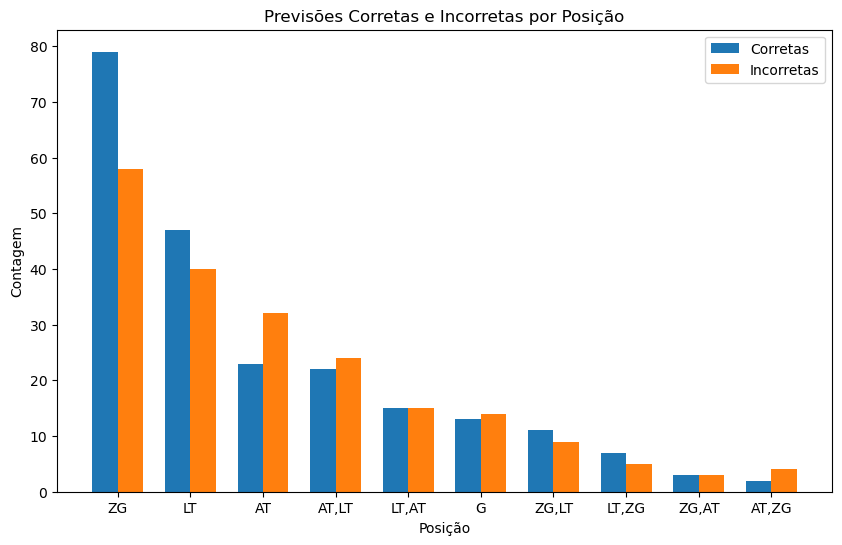

In [211]:
# contar as previsões corretas e incorretas para cada posição
correct_counts = pd.Series(0, index=positions)
incorrect_counts = pd.Series(0, index=positions)

# Contar as previsões corretas e incorretas para cada posição
for i in range(len(random_forest_predictions)):
    if random_forest_predictions[i] == y_test[i]:
        correct_counts[y_test_decoded[i]] += 1
    else:
        incorrect_counts[y_test_decoded[i]] += 1

# Ordenar as posições com base na contagem de previsões corretas
sorted_positions = correct_counts.sort_values(ascending=False).index

# Ajustar o gráfico de barras
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = np.arange(len(positions))

# Plotar as barras para previsões corretas e incorretas, usando a ordem correta das posições
plt.bar(index, correct_counts[sorted_positions], bar_width, label='Corretas')
plt.bar(index + bar_width, incorrect_counts[sorted_positions], bar_width, label='Incorretas')

# Configurar o eixo x
plt.xticks(index + bar_width / 2, sorted_positions)
plt.xlabel('Posição')
plt.ylabel('Contagem')

# Configurar título e legenda
plt.title('Previsões Corretas e Incorretas por Posição')
plt.legend()

# Exibir o gráfico
plt.show()

## Curva Precision-Recall para o resultado


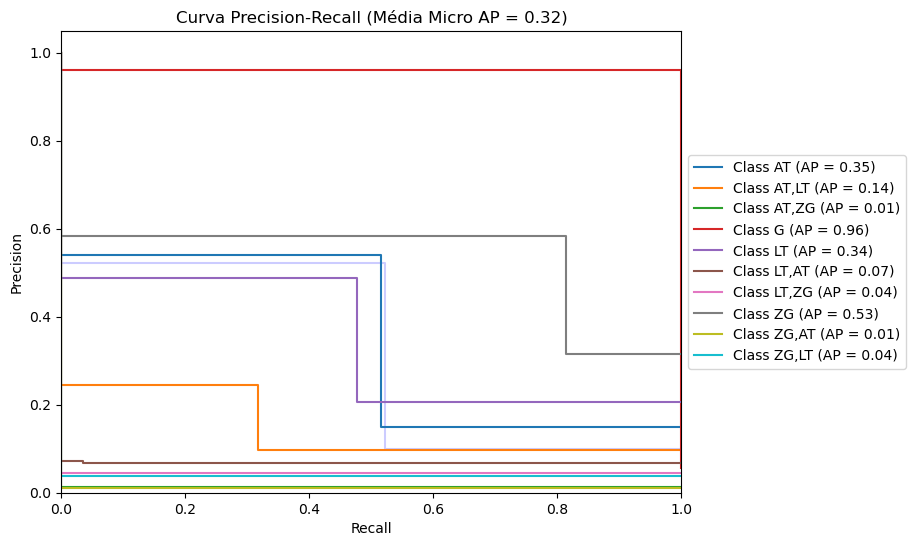

In [212]:
# Decodificar as previsões para obter as classes originais
y_test_decoded = label_encoder.inverse_transform(y_test)
random_forest_predictions_decoded = label_encoder.inverse_transform(random_forest_predictions)

# Criar uma lista de listas com as classes reais e as previsões
y_test_multi = [[pos] for pos in y_test_decoded]
random_forest_predictions_multi = [[pos] for pos in random_forest_predictions_decoded]

# Binarizar as classes usando MultiLabelBinarizer
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test_multi)
random_forest_predictions_bin = mlb.transform(random_forest_predictions_multi)

# Calcular a curva Precision-Recall para cada classe
precision = dict()
recall = dict()
average_precision = dict()
for i, class_label in enumerate(mlb.classes_):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], random_forest_predictions_bin[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], random_forest_predictions_bin[:, i])

# Calcular a média da precisão média ponderada (average precision score) para a média micro
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), random_forest_predictions_bin.ravel())
average_precision["micro"] = average_precision_score(y_test_bin, random_forest_predictions_bin, average="micro")

# Plotar a curva Precision-Recall para cada classe
plt.figure(figsize=(8, 6))
plt.step(recall["micro"], precision["micro"], color='b', alpha=0.2, where='post')
for i, class_label in enumerate(mlb.classes_):
    plt.step(recall[i], precision[i], where='post', label='Class {0} (AP = {1:0.2f})'.format(class_label, average_precision[i]))

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Curva Precision-Recall (Média Micro AP = {0:0.2f})'.format(average_precision["micro"]))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()